<h1> <center>Project 2 <br> Exploratory Data Analysis for Book Prices</center> <h1>

<p align="center">
<b>Group AMS(A)-2</b>: <br>
HONG Kimmeng &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  e20200559 <br>
KHON Yin Sakal &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  e20200425 <br>
KEO Vonmonyroth &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e20200759 <br>
KHEANG Tongheang &nbsp;&nbsp; e20200472 <br>
EAB Pisey &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e20200994 <br>
HONG Kimleng &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e20200766
</p>

# 1. Data Cleaning

## Importing Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from pandas import Series
from numpy.random import seed
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('book-rescrape.csv')

print dataframe

In [10]:
df.head()

,Unnamed: 0,Name,Prices,Page,Format,Language,Pub Date,Publisher,Author,Dimensions,Categories
0,0,Pageboy: A Memoir,27.89,288.0,Hardcover,English,"June 06, 2023",Flatiron Books,Elliot Page,5.6 X 8.6 X 1.2 inches | 0.8 pounds,Entertainment & Performing Arts Personal Mem...
1,1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,Hardcover,English,"August 22, 2023",DK Publishing (Dorling Kindersley),Mercury Stardust,0.0 X 0.0 X 0.0 inches | 1.25 pounds,LGBT Maintenance & Repair Reference
2,2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,Paperback,English,"May 16, 2023",Haymarket Books,Kelly Hayes,5.5 X 8.4 X 0.8 inches | 0.85 pounds,Political Ideologies - Radicalism Feminism &...
3,3,Quietly Hostile: Essays,15.81,304.0,Paperback,English,"May 16, 2023",Vintage,Samantha Irby,5.1 X 7.9 X 0.8 inches | 0.5 pounds,Personal Memoirs Form - Essays Essays
4,4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,Hardcover,English,"October 18, 2022",Harper,Barbara Kingsolver,6.4 X 8.9 X 1.7 inches | 1.94 pounds,Literary Coming of Age Small Town & Rural ...


In [11]:
df.shape

(2493, 11)

## Handling Missing Value

Extract Length, Width, Height and Heigth from Dimensions

In [12]:
dimensions = df['Dimensions'].str.extract(r'(\d+\.?\d*) X (\d+\.?\d*) X (\d+\.?\d*) inches \| (\d+\.?\d*) pounds', expand=True)
dimensions.columns = ['Length','Width','Height','Weight']
dimensions = dimensions.astype(float)
# dimensions.head()

Re-assign back into dataframe

In [13]:
df = df.assign(Length=dimensions['Length'].values, Width=dimensions['Width'].values, Height=dimensions['Height'], **{'Weight(lb)': dimensions['Weight']})
new_order = ['Name','Prices','Page','Format',	'Language',	'Pub Date','Publisher','Author','Length','Width','Height','Weight(lb)','Categories']
df = df.reindex(columns=new_order)
# df.head()

check for missing values

In [14]:
# check for NaN
df.isna().sum()

Name           0
Prices        14
Page           7
Format         0
Language       0
Pub Date       0
Publisher      0
Author         0
Length         2
Width          2
Height         2
Weight(lb)     2
Categories     0
dtype: int64

In [15]:
# Replace the NaN value with mean value and print the length of outliers
df['Prices'].fillna(df['Prices'].mean(), inplace = True)
df['Page'].fillna(df['Page'].mean(), inplace = True)
df['Length'].fillna(df['Length'].mean(), inplace = True)
df['Width'].fillna(df['Width'].mean(), inplace = True)
df['Height'].fillna(df['Height'].mean(), inplace = True)
df['Weight(lb)'].fillna(df['Weight(lb)'].mean(), inplace = True)

In [16]:
# check if any of these features contain 0
df.eq(0).sum()

Name            0
Prices          0
Page            0
Format          0
Language        0
Pub Date        0
Publisher       0
Author          0
Length        134
Width         134
Height        135
Weight(lb)     94
Categories      0
dtype: int64

In [17]:
# replace the 0 values with the average value of the features
df['Length'].replace(0, df['Length'].mean(), inplace = True)
df['Width'].replace(0,df['Width'].mean(), inplace = True)
df['Height'].replace(0,df['Height'].mean(), inplace = True)
df['Weight(lb)'].replace(0,df['Weight(lb)'].mean(), inplace = True)

## Cleaning Categories column

In [18]:
# replace triple space between each category type by commas and remove the last extra one at the end
for x in range(0,len(df)):
    df['Categories'][x] = df['Categories'][x].replace("   ",",")[:-1]

In [19]:
# remove unnecessary bracket text
import re

for x in range(0,len(df)):
    df['Categories'][x] = re.sub("\(.*?\)","",df['Categories'][x])

In [20]:
# remove sub section (located after " - ")

for x in range(0,len(df)):
    # for categories that are located in the middle and front (between - and ,)
    df['Categories'][x] = re.sub("\s\-.*?\,", ",", df['Categories'][x])
    # for categories that are located in the at the end (between - and none)
    df['Categories'][x] = re.sub("\s\-.*?$", "", df['Categories'][x])

## Handling Outlier

In [21]:
# New copy of dataframe
df_clean = df.copy()

Remove outlier in numerical variable

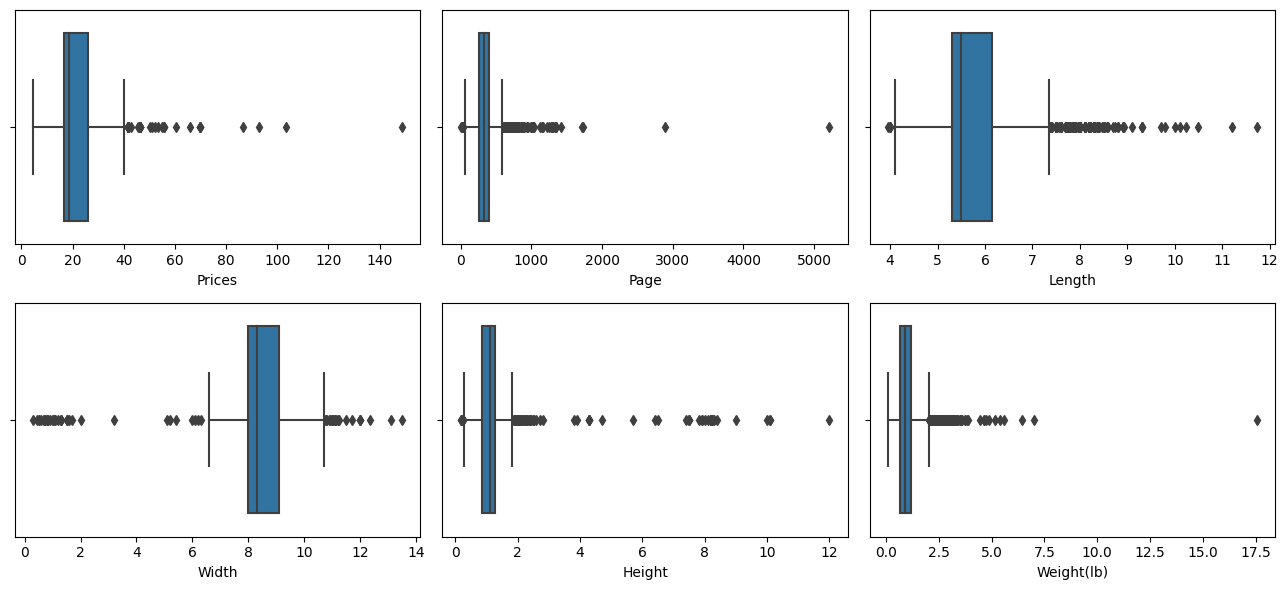

In [22]:
# Plot boxplots of each numerical feature
fig, axes = plt.subplots(2, 3, figsize = (13, 6))
sns.boxplot(data = df_clean, x='Prices', ax=axes[0, 0])
sns.boxplot(data = df_clean, x='Page', ax=axes[0, 1])
sns.boxplot(data = df_clean, x='Length', ax=axes[0, 2])
sns.boxplot(data = df_clean, x='Width', ax=axes[1, 0])
sns.boxplot(data = df_clean, x='Height', ax=axes[1, 1])
sns.boxplot(data = df_clean, x='Weight(lb)', ax=axes[1, 2])
plt.tight_layout()
plt.show()

In [23]:
# define upper and lower boundaries of each variable
def find_boundaries(df, variable):
  Q1 = df[variable].quantile(.25)
  Q3 = df[variable].quantile(.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return lower_bound, upper_bound

In [24]:
# Replace the outliers and print the length of outliers
print("Number of Outliers was :")
for col in ['Prices', 'Page', 'Length', 'Width', 'Height', 'Weight(lb)']:
  lower_bound, upper_bound = find_boundaries(df_clean, col)
  outliers = df_clean[(df_clean[col] > upper_bound) | (df_clean[col] < lower_bound)]
  print(f"{col}: {len(outliers)}")
  mean_col = df_clean[col].mean()
  # clip (limit the min and the max of the array)
  df_clean[col] = np.clip(df_clean[col], a_min = lower_bound, a_max = upper_bound)

Number of Outliers was :
Prices: 37
Page: 163
Length: 139
Width: 67
Height: 113
Weight(lb): 151


Remove outlier in categorical variable

In [25]:
df_clean.head()

,Name,Prices,Page,Format,Language,Pub Date,Publisher,Author,Length,Width,Height,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,Hardcover,English,"June 06, 2023",Flatiron Books,Elliot Page,5.600000,8.600000,1.200000,0.80,"Entertainment & Performing Arts,Personal Memoi..."
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,Hardcover,English,"August 22, 2023",DK Publishing (Dorling Kindersley),Mercury Stardust,5.485528,7.986467,1.114014,1.25,"LGBT,Maintenance & Repair,Reference"
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,Paperback,English,"May 16, 2023",Haymarket Books,Kelly Hayes,5.500000,8.400000,0.800000,0.85,"Political Ideologies,Feminism & Feminist Theor..."
3,Quietly Hostile: Essays,15.81,304.0,Paperback,English,"May 16, 2023",Vintage,Samantha Irby,5.100000,7.900000,0.800000,0.50,"Personal Memoirs,Form,Essays"
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,Hardcover,English,"October 18, 2022",Harper,Barbara Kingsolver,6.400000,8.900000,1.700000,1.94,"Literary,Coming of Age,Small Town & Rural,Sout..."




*   Format



In [26]:
# check the book format column
format = df_clean['Format'].value_counts().reset_index(name='count')
format

,Format,count
0,Paperback,1321
1,Hardcover,1094
2,Mass Market Paperbound,70
3,Boxed Set,4
4,Other,2
5,Board Games,1
6,Leather,1


In [27]:
# We decide to remove the rows of format type of book which have small amount of count
df_clean['Format'][df_clean['Format'].isin(['Boxed Set', 'Other', 'Board Games', 'Leather'])] = df_clean['Format'].mode()



*   Publisher & Author




In [28]:
# check the book publisher column
publisher = df['Publisher'].value_counts().reset_index()
publisher.columns = ['Publisher','count']
publisher

,Publisher,count
0,Vintage,98
1,Penguin Books,61
2,Tor Books,56
3,W. W. Norton & Company,48
4,Scribner Book Company,48
...,...,...
441,Laurence King,1
442,Armina Press,1
443,Semiotext(e),1
444,Nauset Press,1


In [29]:
# check the book author column
author = df['Author'].value_counts().reset_index(name='count')
author.columns = ['Author', 'count']
author

,Author,count
0,Sarah J. Maas,18
1,Brandon Sanderson,14
2,Terry Pratchett,14
3,Cormac McCarthy,11
4,Mo Xiang Tong Xiu,11
...,...,...
1952,Bernardine Evaristo,1
1953,Marlen Haushofer,1
1954,Anna Lowenhaupt Tsing,1
1955,Frantz Fanon,1


Too many Author and Publisher with low count so we are not going to replace any value to preserve the data



*   Languages



In [30]:
language = df['Language'].value_counts().reset_index(name='count')
language.columns = ['language', 'count']
language

,language,count
0,English,2488
1,Spanish,5


Dropping the whole column since vast majority in in English

In [31]:
df_clean.drop(columns='Language', inplace=True)

# Data Exploratory

## Feature Engineering

In [32]:
df_clean.head()

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Length,Width,Height,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,Hardcover,"June 06, 2023",Flatiron Books,Elliot Page,5.600000,8.600000,1.200000,0.80,"Entertainment & Performing Arts,Personal Memoi..."
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,Hardcover,"August 22, 2023",DK Publishing (Dorling Kindersley),Mercury Stardust,5.485528,7.986467,1.114014,1.25,"LGBT,Maintenance & Repair,Reference"
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,Paperback,"May 16, 2023",Haymarket Books,Kelly Hayes,5.500000,8.400000,0.800000,0.85,"Political Ideologies,Feminism & Feminist Theor..."
3,Quietly Hostile: Essays,15.81,304.0,Paperback,"May 16, 2023",Vintage,Samantha Irby,5.100000,7.900000,0.800000,0.50,"Personal Memoirs,Form,Essays"
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,Hardcover,"October 18, 2022",Harper,Barbara Kingsolver,6.400000,8.900000,1.700000,1.94,"Literary,Coming of Age,Small Town & Rural,Sout..."


### Converting Features

::Change the format of publish date into day count since published

In [33]:
# find days passed between the present and the published date
df_clean['Pub Date'] = pd.to_datetime(df_clean['Pub Date'])

# Creating a function that returns the number of days
def calculate_days(date):
    today = pd.Timestamp('today')
    return (today - date).days

# Apply the function to the column date
days = df_clean['Pub Date'].apply(lambda x: calculate_days(x))
days

0         61
1        -16
2         82
3         82
4        292
        ... 
2488    1293
2489     418
2490     425
2491    2287
2492    1713
Name: Pub Date, Length: 2493, dtype: int64

In [34]:
# insert the new column over the old Pub Date
df_clean['Pub Date'] = days
df_clean['Pub Date']

0         61
1        -16
2         82
3         82
4        292
        ... 
2488    1293
2489     418
2490     425
2491    2287
2492    1713
Name: Pub Date, Length: 2493, dtype: int64

In [35]:
# Find total number of books with negative days published (not released yet)
df_clean['Pub Date'].lt(0).sum()

149

In [36]:
# We can continue analyzing books with negative value day_published in the mix, but there are only a total of 198 which is neglichable
# We are just going to group them into one group as non-released (day_published = 0)

df_clean['Pub Date'][df_clean['Pub Date']< 0] = 0

df_clean.head()

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Length,Width,Height,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,Hardcover,61,Flatiron Books,Elliot Page,5.600000,8.600000,1.200000,0.80,"Entertainment & Performing Arts,Personal Memoi..."
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,Hardcover,0,DK Publishing (Dorling Kindersley),Mercury Stardust,5.485528,7.986467,1.114014,1.25,"LGBT,Maintenance & Repair,Reference"
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,Paperback,82,Haymarket Books,Kelly Hayes,5.500000,8.400000,0.800000,0.85,"Political Ideologies,Feminism & Feminist Theor..."
3,Quietly Hostile: Essays,15.81,304.0,Paperback,82,Vintage,Samantha Irby,5.100000,7.900000,0.800000,0.50,"Personal Memoirs,Form,Essays"
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,Hardcover,292,Harper,Barbara Kingsolver,6.400000,8.900000,1.700000,1.94,"Literary,Coming of Age,Small Town & Rural,Sout..."


Creating new features (Volume, Surface Area)

In [37]:
volume = df_clean['Length'] * df_clean['Width'] * df_clean['Height']
surface = df_clean['Length'] * df_clean['Width']
size = pd.DataFrame({'Volume': volume, 'Surface' : surface, 'Page' : df_clean['Page']})
size

,Volume,Surface,Page
0,57.792000,48.160000,288.0
1,48.804961,43.809989,224.0
2,36.960000,46.200000,296.0
3,32.232000,40.290000,304.0
4,96.832000,56.960000,560.0
...,...,...,...
2488,85.904000,53.690000,576.0
2489,58.468400,58.468400,272.0
2490,64.077216,45.124800,496.0
2491,37.875200,43.040000,336.0


Group the Surface Area into Cover size type and Height into Thickness Type

In [38]:
# Surface to Cover size

bins = [0, 35, 60, np.inf]
labels = ['Small', 'Medium', 'Large']
cover_size = pd.cut(x = size['Surface'], bins = bins, labels = labels, include_lowest = True)
cover_size.value_counts()

Surface
Medium    2104
Large      270
Small      119
Name: count, dtype: int64

In [39]:
# Height to Thickness

bins = [0, 1, 1.5, np.inf]
labels = ['Thin', 'Medium', 'Thick']
thickness = pd.cut(x = df_clean['Height'], bins = bins, labels = labels, include_lowest = True)
thickness.value_counts()

Height
Thin      1147
Medium    1087
Thick      259
Name: count, dtype: int64

In [40]:
df_clean['Cover Size'] = cover_size
df_clean['Thickness'] = thickness
new_order = ['Name','Prices','Page','Format',	'Pub Date','Publisher','Author','Cover Size','Thickness','Weight(lb)','Categories']
df_clean = df_clean.reindex(columns=new_order)

In [41]:
df_clean

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Cover Size,Thickness,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,Hardcover,61,Flatiron Books,Elliot Page,Medium,Medium,0.80,"Entertainment & Performing Arts,Personal Memoi..."
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,Hardcover,0,DK Publishing (Dorling Kindersley),Mercury Stardust,Medium,Medium,1.25,"LGBT,Maintenance & Repair,Reference"
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,Paperback,82,Haymarket Books,Kelly Hayes,Medium,Thin,0.85,"Political Ideologies,Feminism & Feminist Theor..."
3,Quietly Hostile: Essays,15.81,304.0,Paperback,82,Vintage,Samantha Irby,Medium,Thin,0.50,"Personal Memoirs,Form,Essays"
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,Hardcover,292,Harper,Barbara Kingsolver,Medium,Thick,1.94,"Literary,Coming of Age,Small Town & Rural,Sout..."
...,...,...,...,...,...,...,...,...,...,...,...
2488,Tiamat's Wrath,17.66,576.0,Paperback,1293,Orbit,James S. A. Corey,Medium,Thick,1.23,"Science Fiction,Science Fiction,Science Fictio..."
2489,Building a Second Brain: A Proven Method to Or...,26.04,272.0,Hardcover,418,Atria Books,Tiago Forte,Medium,Thin,1.06,"Personal Success,Creativity,Information Manage..."
2490,For the Throne,16.73,496.0,Paperback,425,Orbit,Hannah Whitten,Medium,Medium,0.96,"Fantasy,Fantasy"
2491,Commonwealth,16.74,336.0,Paperback,2287,Harper Perennial,Ann Patchett,Medium,Thin,0.55,"Literary,Coming of Age,Family Life,Family Life..."


### Target Encoding

In [42]:
# new dataframe
df_label = df_clean.copy()

In [44]:
import category_encoders as ce

target = ce.TargetEncoder(cols=['Format','Publisher','Author'])

# Fit the TargetEncoder on the training data
df_label[['Format','Publisher','Author']] = target.fit_transform(df_clean[['Format','Publisher','Author']],df_clean['Prices'].values)

### Ordinal Encoding

In [45]:
oe = OrdinalEncoder(categories = [['Small', 'Medium', 'Large'], ['Thin', 'Medium', 'Thick']])

In [48]:
oe.fit(df_clean[['Cover Size', 'Thickness']])

OrdinalEncoder(categories=[['Small', 'Medium', 'Large'],
                           ['Thin', 'Medium', 'Thick']])

In [49]:
df_label[['Cover Size', 'Thickness']] = oe.transform(df_clean[['Cover Size', 'Thickness']])

In [50]:
df_label.head()

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Cover Size,Thickness,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,27.229933,61,22.866097,21.964441,1.0,1.0,0.80,"Entertainment & Performing Arts,Personal Memoi..."
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,27.229933,0,22.866245,21.749272,1.0,1.0,1.25,"LGBT,Maintenance & Repair,Reference"
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,17.386380,82,19.906852,20.897062,1.0,0.0,0.85,"Political Ideologies,Feminism & Feminist Theor..."
3,Quietly Hostile: Essays,15.81,304.0,17.386380,82,15.814177,20.592877,1.0,0.0,0.50,"Personal Memoirs,Form,Essays"
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,27.229933,292,22.078555,21.249757,1.0,2.0,1.94,"Literary,Coming of Age,Small Town & Rural,Sout..."


### Target Encoding on Book Categories

In [51]:
df_explode = df_label.copy()
df_explode['Categories'] = df_clean['Categories']

df_explode['Categories'] = df_explode['Categories'].str.split(',')
df_explode = df_explode.explode('Categories')

In [52]:
df_explode.head()

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Cover Size,Thickness,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,27.229933,61,22.866097,21.964441,1.0,1.0,0.80,Entertainment & Performing Arts
0,Pageboy: A Memoir,27.89,288.0,27.229933,61,22.866097,21.964441,1.0,1.0,0.80,Personal Memoirs
0,Pageboy: A Memoir,27.89,288.0,27.229933,61,22.866097,21.964441,1.0,1.0,0.80,LGBT
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,27.229933,0,22.866245,21.749272,1.0,1.0,1.25,LGBT
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,27.229933,0,22.866245,21.749272,1.0,1.0,1.25,Maintenance & Repair


In [53]:
df_explode['Categories'].value_counts()

Categories
Literary                  601
Fantasy                   445
Women                     383
Science Fiction           313
Romance                   313
                         ... 
 Theater & Musicals         1
Multiracial Families        1
Speeches                    1
Learning Disabilities       1
Information Management      1
Name: count, Length: 736, dtype: int64

In [54]:
# perform target encoding on book Categories of the exploded data
df_explode1 = df_explode.copy()
target1 = ce.TargetEncoder(cols = 'Categories')
df_explode1['Categories'] = target1.fit_transform(df_explode1['Categories'], df_explode1['Prices'].values)

In [55]:
# Calculate mean price of encoded categories by grouping book titles and replace it in the label data
mean_encoded_categories = df_explode1['Categories'].groupby(df_explode1.index).mean()
df_label['Categories'] = mean_encoded_categories.values

In [56]:
df_label.head()

,Name,Prices,Page,Format,Pub Date,Publisher,Author,Cover Size,Thickness,Weight(lb),Categories
0,Pageboy: A Memoir,27.89,288.0,27.229933,61,22.866097,21.964441,1.0,1.0,0.80,22.494100
1,Safe and Sound: A Renter-Friendly Guide to Hom...,23.24,224.0,27.229933,0,22.866245,21.749272,1.0,1.0,1.25,22.229108
2,Let This Radicalize You: Organizing and the Re...,16.69,296.0,17.386380,82,19.906852,20.897062,1.0,0.0,0.85,21.131040
3,Quietly Hostile: Essays,15.81,304.0,17.386380,82,15.814177,20.592877,1.0,0.0,0.50,21.199378
4,Demon Copperhead: A Pulitzer Prize Winner,30.23,560.0,27.229933,292,22.078555,21.249757,1.0,2.0,1.94,20.230740


In [57]:
# filter out and include only categories with >= 30 counts
df_explode = df_explode.groupby('Categories').filter(lambda x : len(x)>29)

## Features Visualization

In [58]:
df_clean.describe()

,Prices,Page,Pub Date,Weight(lb)
count,2493.000000,2493.000000,2493.000000,2493.000000
mean,21.526306,344.679180,1504.265142,0.977621
std,6.609537,119.024923,2767.194792,0.447637
min,4.650000,60.000000,0.000000,0.100000
25%,16.690000,264.000000,96.000000,0.640000
50%,18.600000,336.000000,411.000000,0.900000
75%,26.040000,400.000000,1552.000000,1.200000
max,40.065000,604.000000,48064.000000,2.040000


In [60]:
from skimpy import skim

skim(df_clean)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 2493   │ │ string      │ 5     │ │ Cover Size            │                                │
│ │ Number of columns │ 11     │ │ float64     │ 3     │ │ Thickness             │                                │
│ └───────────────────┴────────┘ │ category    │ 2     │ └───────────────────────┘                                │
│                                │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100     ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Prices             │    0 │       0 │      22 │     6.6 │    4.7 │      17 │      26 │       40 │  ▁▅▇█▁▁  │  │
│ │ Page               │    0 │       0 │     340 │     120 │     60 │     260 │     400 │      600 │  ▁▄██▃▃  │  │
│ │ Pub Date           │    0 │       0 │    1500 │    2800 │      0 │      96 │    1600 │    48000 │    █     │  │
│ │ Weight(lb)         │    0 │       0 │    0.98 │    0.45 │    0.1 │    0.64 │     1.2 │        2 │  ▁▇█▄▂▂  │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴────────┴─────────┴─────────┴──────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Cover Size                       │         0 │              0 │ True                  │                  3 │  │
│ │ Thickness                        │         0 │              0 │ True                  │                  3 │  │
│ └──────────────────────────────────┴───────────┴────────────────┴───────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %                            ┃ words per row          ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                │     0 │                               0 │                    7.1 │             17670 │  │
│ │ Format              │     8 │             0.32089851584436424 │                    7.1 │             17670 │  │
│ │ Publisher           │     0 │                               0 │                    7.1 │             17670 │  │
│ │ Author              │     0 │                               0 │                    7.1 │             17670 │  │
│ │ Categories          │     0 │                       

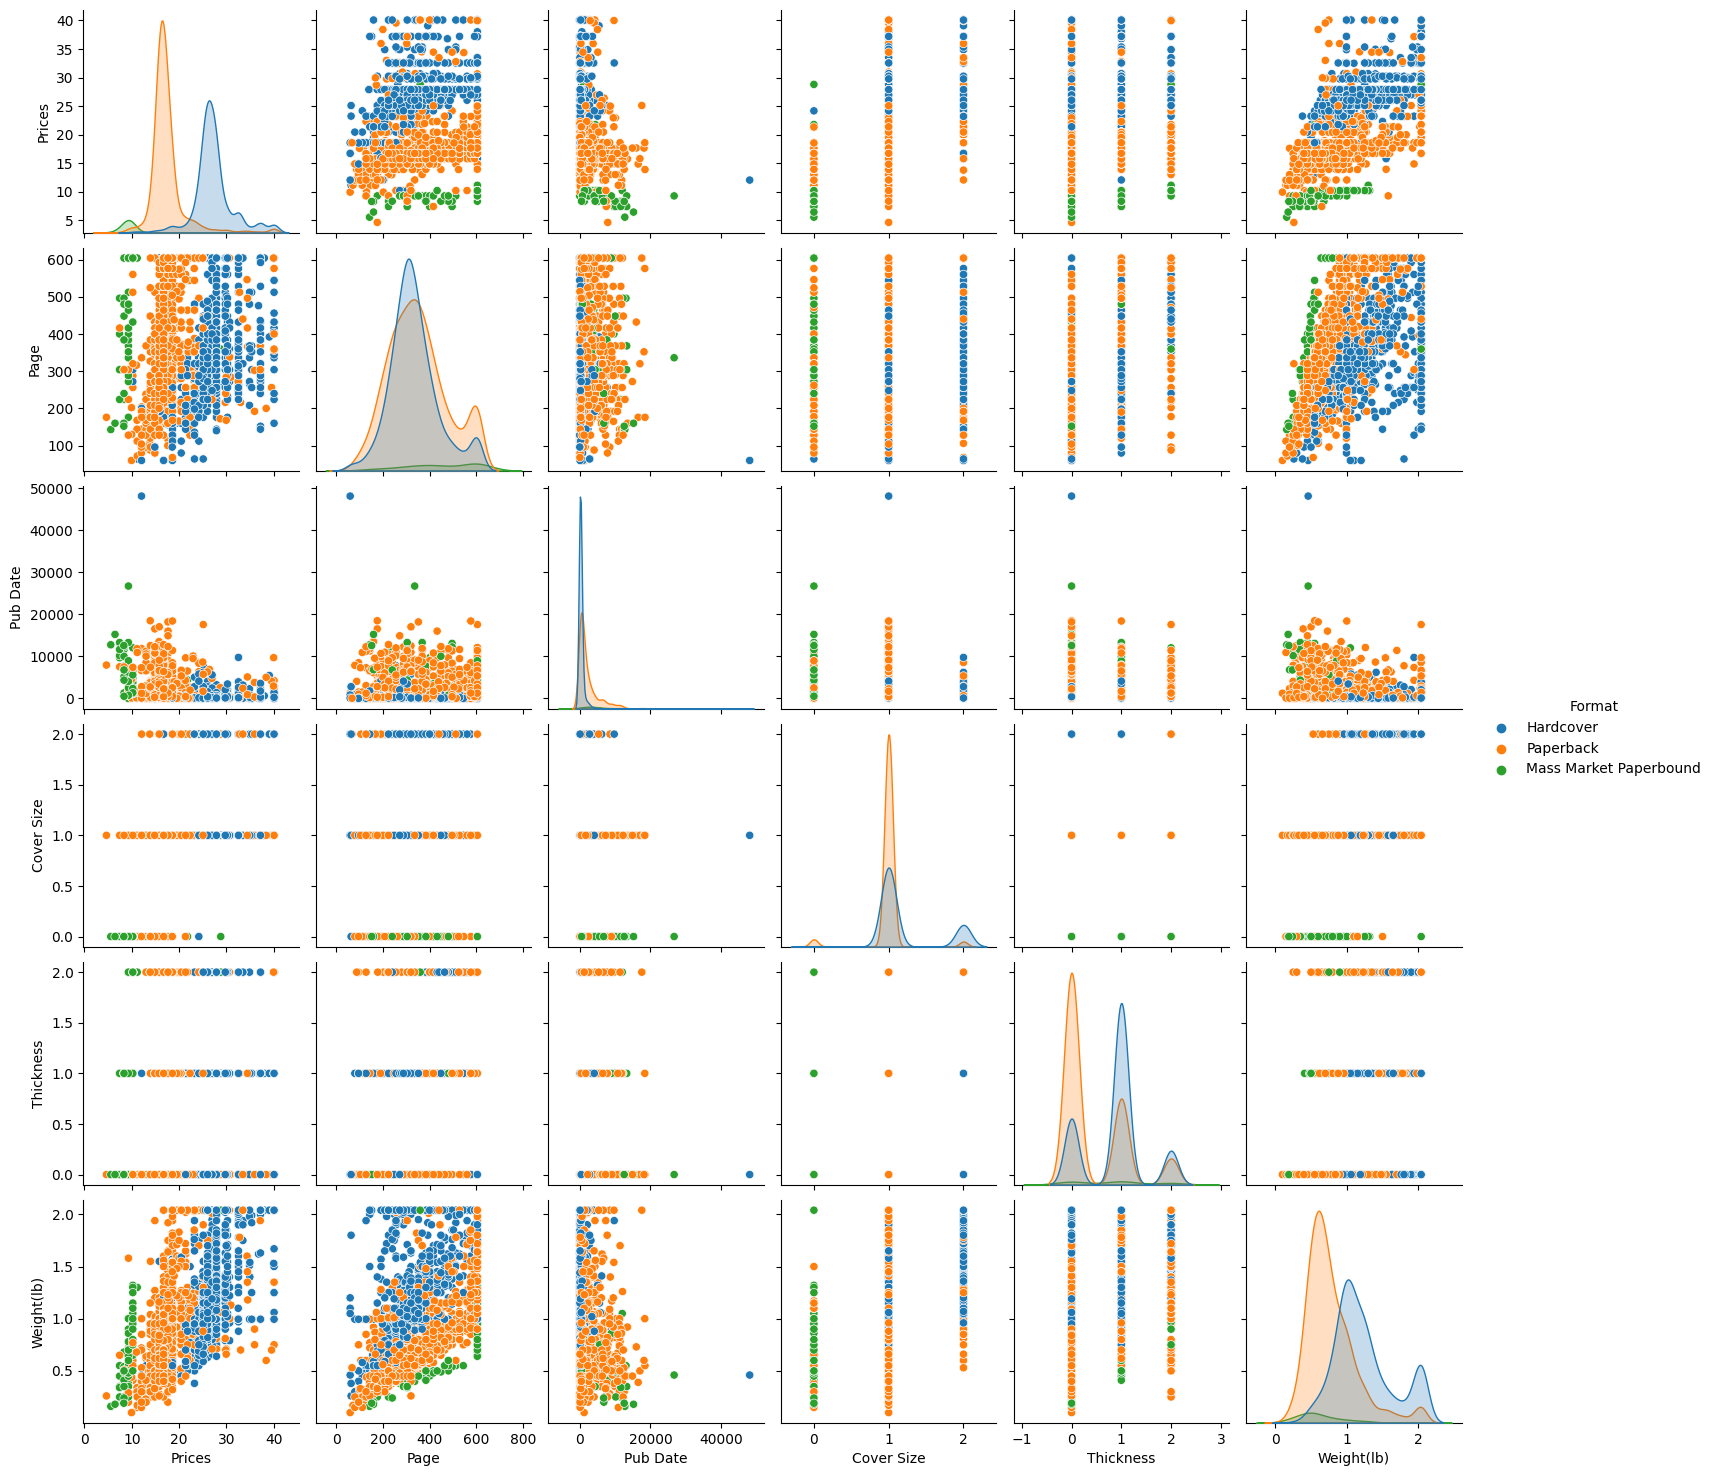

In [61]:
# Create a scatter plot matrix to visualize the relationships between variables
df_pair = df_label.copy()
df_pair['Format'] = df_clean['Format']

sns.pairplot(data = df_pair[['Prices', 'Page', 'Format', 'Pub Date', 'Cover Size', 'Thickness', 'Weight(lb)']], hue='Format')
plt.show()

<Figure size 1500x1000 with 0 Axes>

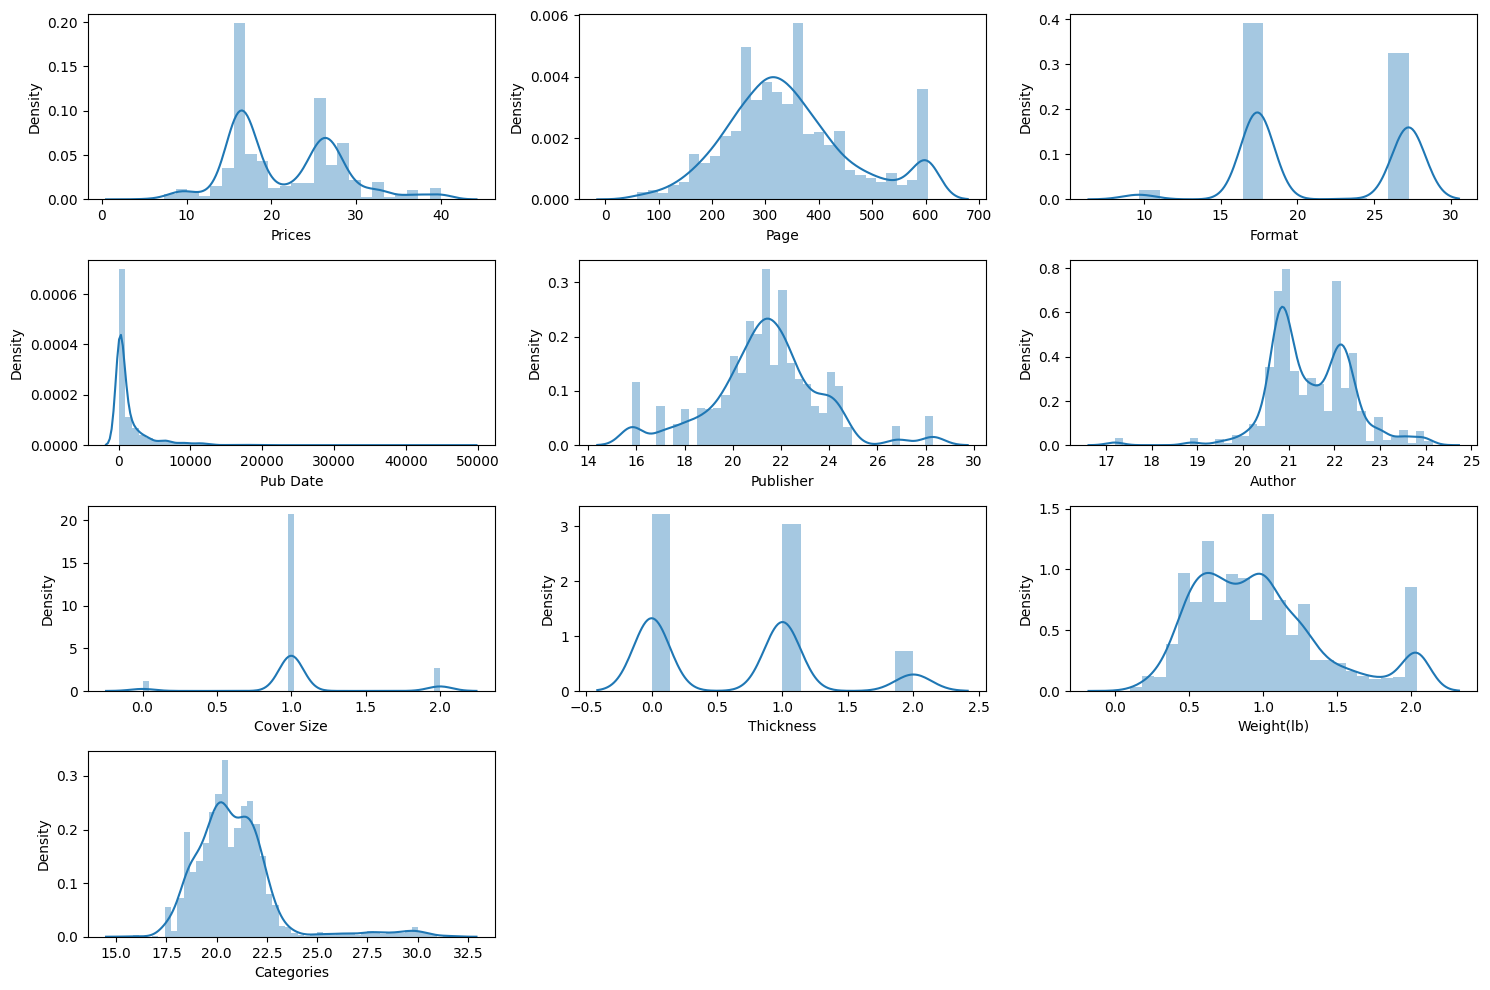

In [62]:
# displot: to check distribution of each feature
plt.figure(figsize=(15,10))
plt.suptitle('')
df_num = [feature for feature in df_label.columns if df_label[feature].dtypes != 'object']

plt.figure(figsize=(15,10))
for i in range(0,len(df_num)):
    plt.subplot(4,3, i+1)
    sns.distplot(x=df_label[df_num[i]])
    plt.xlabel(df_num[i])
    plt.tight_layout()
plt.show()

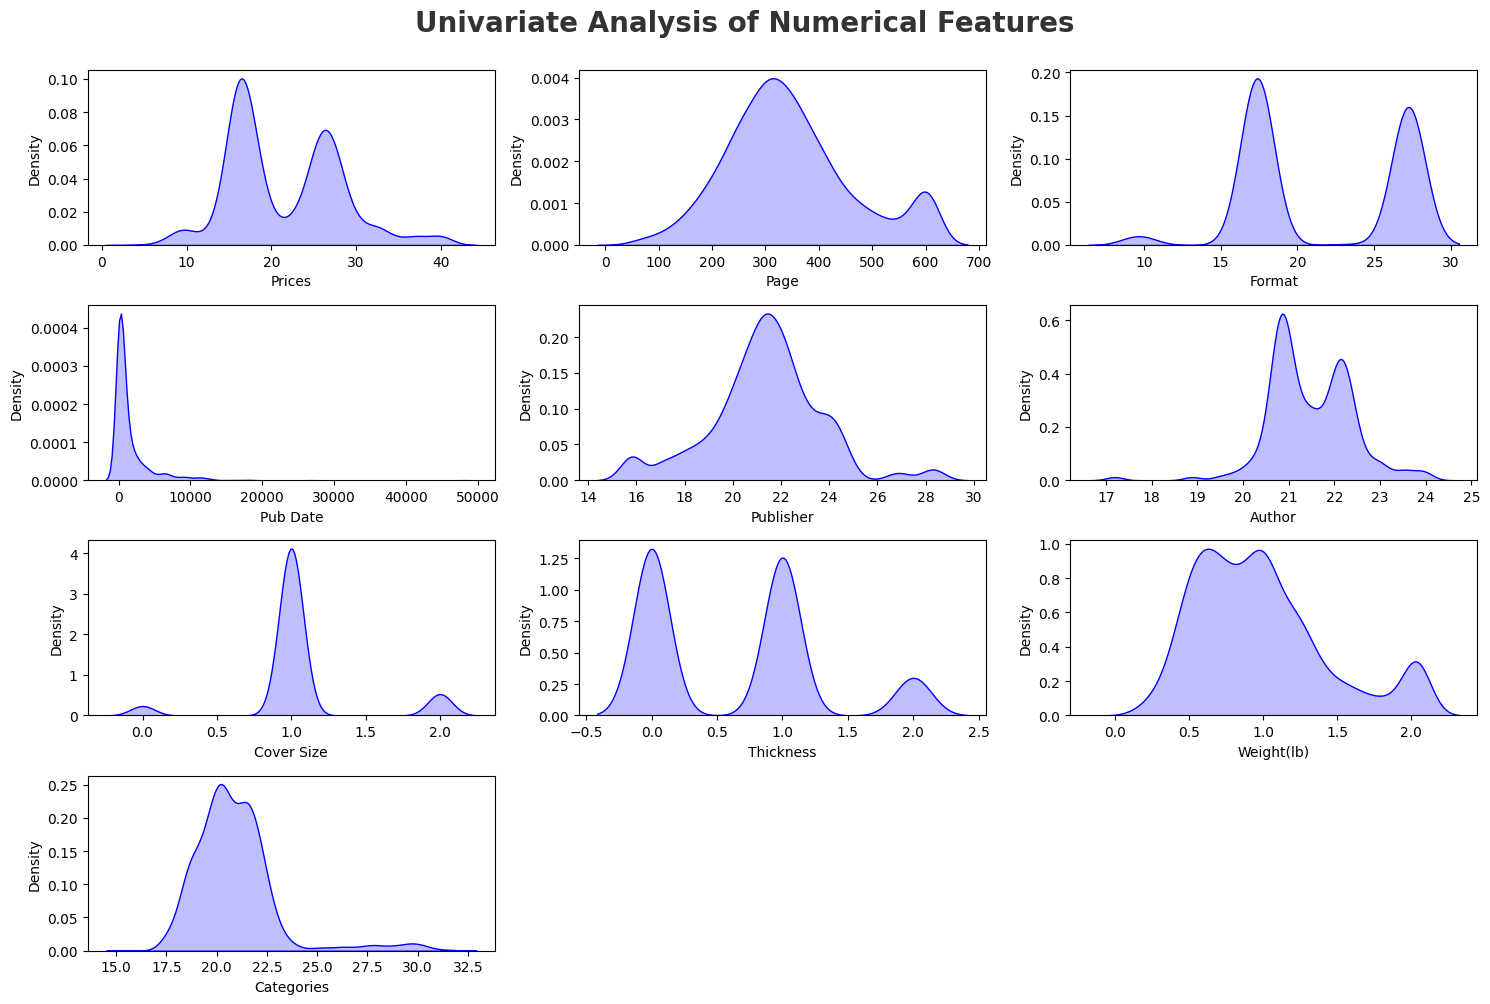

In [63]:
# kdeplot: to check skewness
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_num)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x = df_label[df_num[i]], shade=True, color='b')
    plt.xlabel(df_num[i])
    plt.tight_layout()
plt.show()

### Format vs Date

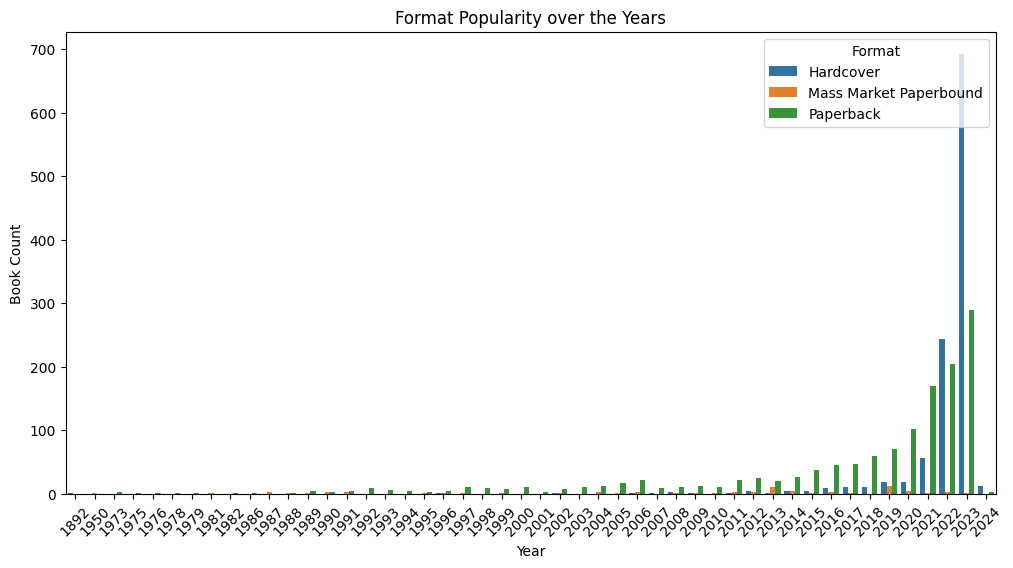

In [65]:
df_date = df_label.copy()
df_date['Publish Date'] = df['Pub Date']
df_date['Format'] = df_clean['Format']
df_date['Publish Date'] = pd.to_datetime(df_date['Publish Date'])

# Group data by format and year of publish date
format_counts = df_date.groupby(['Format', df_date['Publish Date'].dt.year]).size().reset_index(name='Count')

# Plotting format popularity within each year
plt.figure(figsize=(12, 6))
sns.barplot(data=format_counts, x='Publish Date', y='Count', hue='Format')
plt.xlabel('Year')
plt.ylabel('Book Count')
plt.title('Format Popularity over the Years')
plt.xticks(rotation=45)
plt.legend(title='Format')
plt.show()

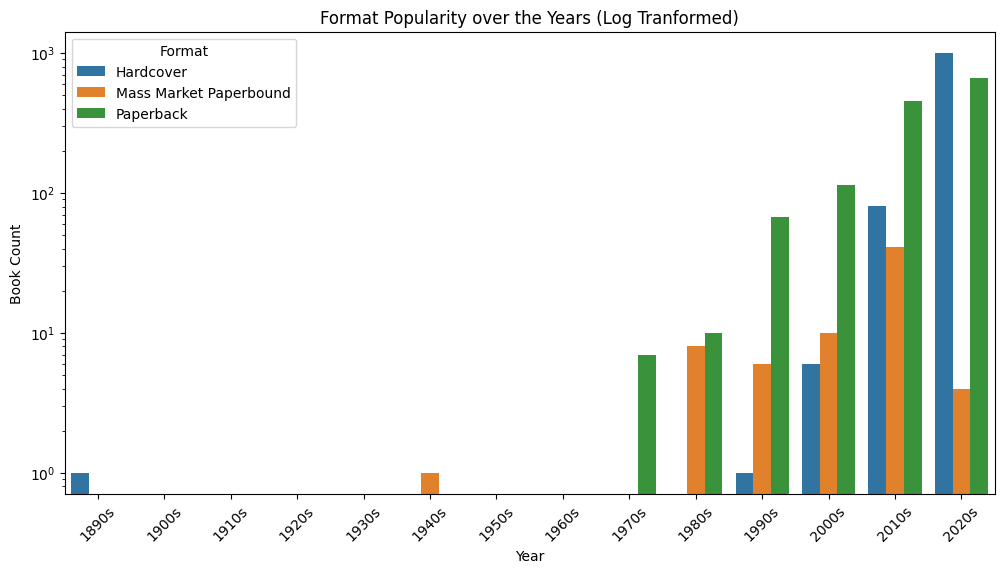

In [66]:
bins = np.arange(1890, 2031, 10)
labels = ['1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', "1980s", "1990s", '2000s', '2010s', '2020s']
format_counts['Year'] = pd.cut(x = format_counts['Publish Date'], bins = bins, labels = labels, include_lowest = True)

format_counts2 = format_counts.groupby(['Format', format_counts['Year']])['Count'].sum().reset_index(name='Count')
# Plotting format popularity within each year
plt.figure(figsize=(12, 6))
sns.barplot(data=format_counts2, x='Year', y='Count', hue='Format')
plt.xlabel('Year')
plt.ylabel('Book Count')
plt.yscale('log')
plt.title('Format Popularity over the Years (Log Tranformed)')
plt.xticks(rotation=45)
plt.legend(title='Format')
plt.show()

Compare to GPT Finding: <br>
- HardCover : Have the longest history, became more prevalent during the 19th century.
- MMPB : Gained popularity in the 1940s and 1950s, more cost effective and portable.
- PaperBack : Have more modern sense, popularity start in the 20th century.

### EDA on Publisher/Author

In [67]:
Publisher = df_clean['Publisher'].value_counts().head(20)
Author = df_clean['Author'].value_counts().head(20)

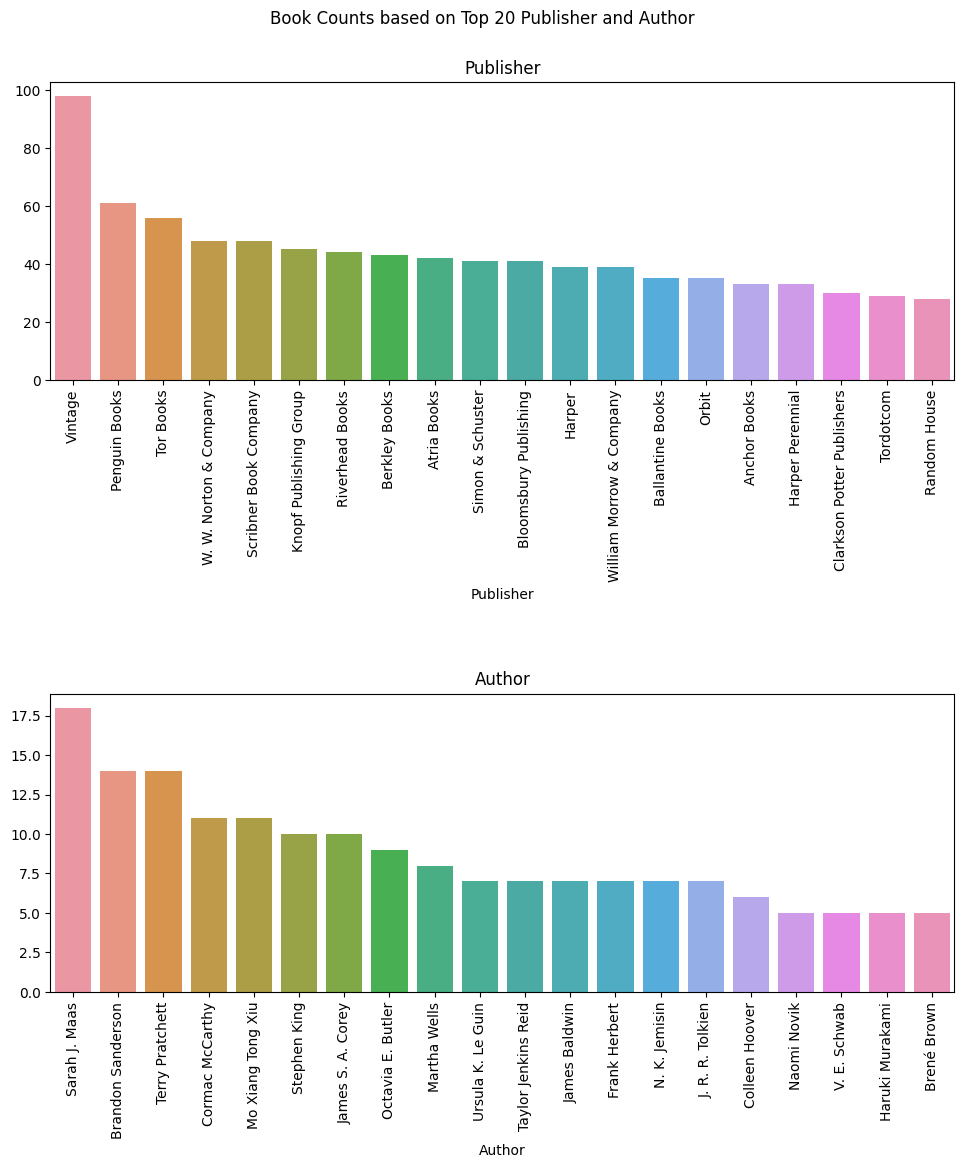

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=False)
fig.suptitle('Book Counts based on Top 20 Publisher and Author')

sns.barplot(ax=axes[0], x=Publisher.index, y=Publisher.values)
axes[0].set_title('Publisher')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], x=Author.index, y=Author.values)
axes[1].set_title('Author')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout(pad=2.0, h_pad=5.0)
plt.show()

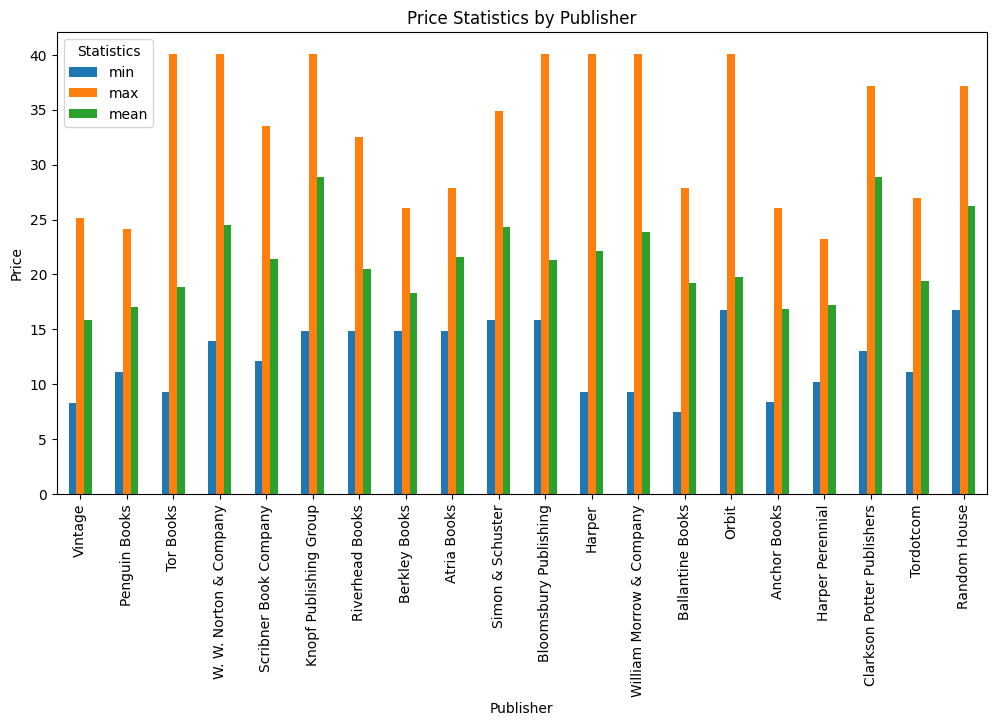

In [69]:
# # Filter the DataFrame for the specified publishers
filtered_df = df_clean[df_clean['Publisher'].isin(Publisher.index.tolist())]

# # Calculate the minimum, maximum, and mean prices for the filtered DataFrame
publisher_stats = filtered_df.groupby('Publisher')['Prices'].agg(['min', 'max', 'mean'])
publisher_stats = publisher_stats.reindex(Publisher.index.tolist())
# # Plot the statistics for each publisher
publisher_stats.plot(kind='bar', figsize=(12, 6))
plt.title('Price Statistics by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(title='Statistics')
plt.show()

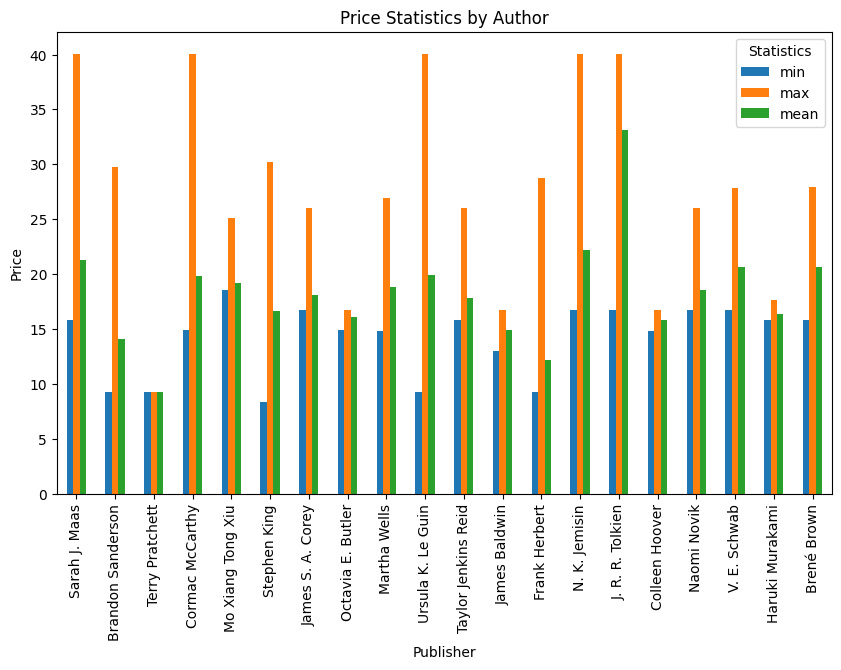

In [70]:
filtered_df = df_clean[df_clean['Author'].isin(Author.index.tolist())]

Author_stats = filtered_df.groupby('Author')['Prices'].agg(['min', 'max', 'mean'])
Author_stats = Author_stats.reindex(Author.index.tolist())

Author_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Price Statistics by Author')
plt.xlabel('Publisher')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(title='Statistics')
plt.show()

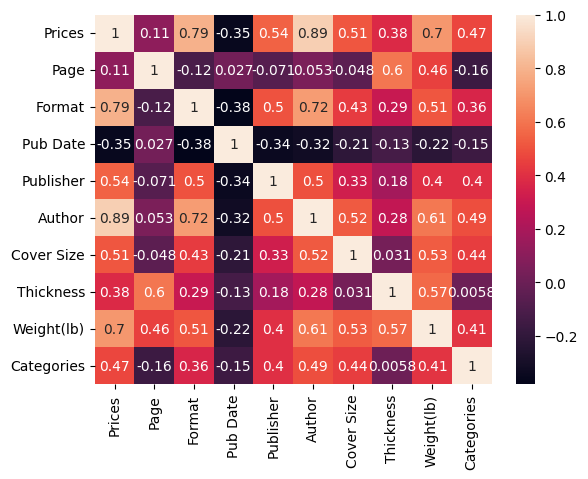

In [73]:
# Compute the correlation matrix to quantify the relationships between variables
plt.figure()
sns.heatmap(df_label.select_dtypes('number').corr(), annot = True)
plt.show()

### EDA on Categories

In [74]:
df_category = df_explode[['Name','Prices','Categories']]

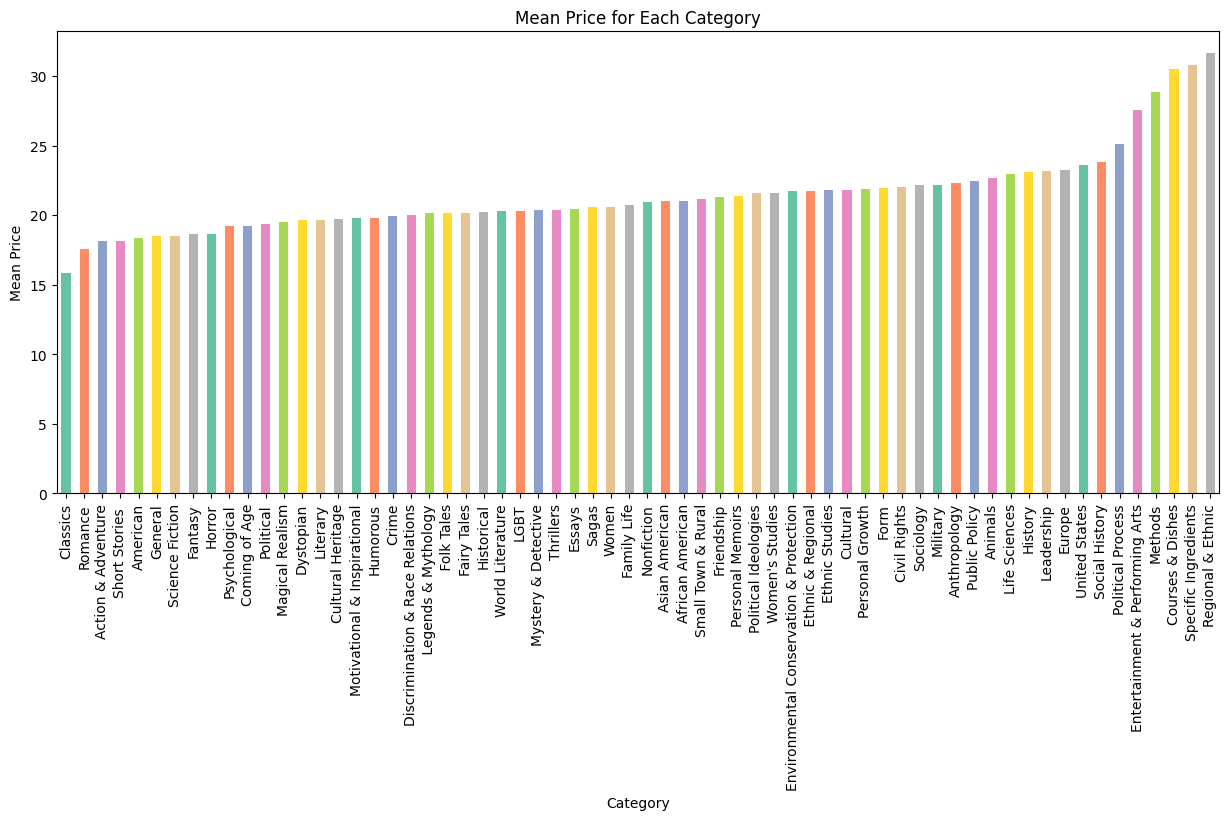

In [75]:
category_mean_price = df_explode.groupby('Categories')['Prices'].mean().sort_values()

# Plot the mean price for each category
colors = sns.color_palette('Set2')
category_mean_price.plot(kind='bar', figsize=(15, 6), color=colors)
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.title('Mean Price for Each Category')
plt.show()

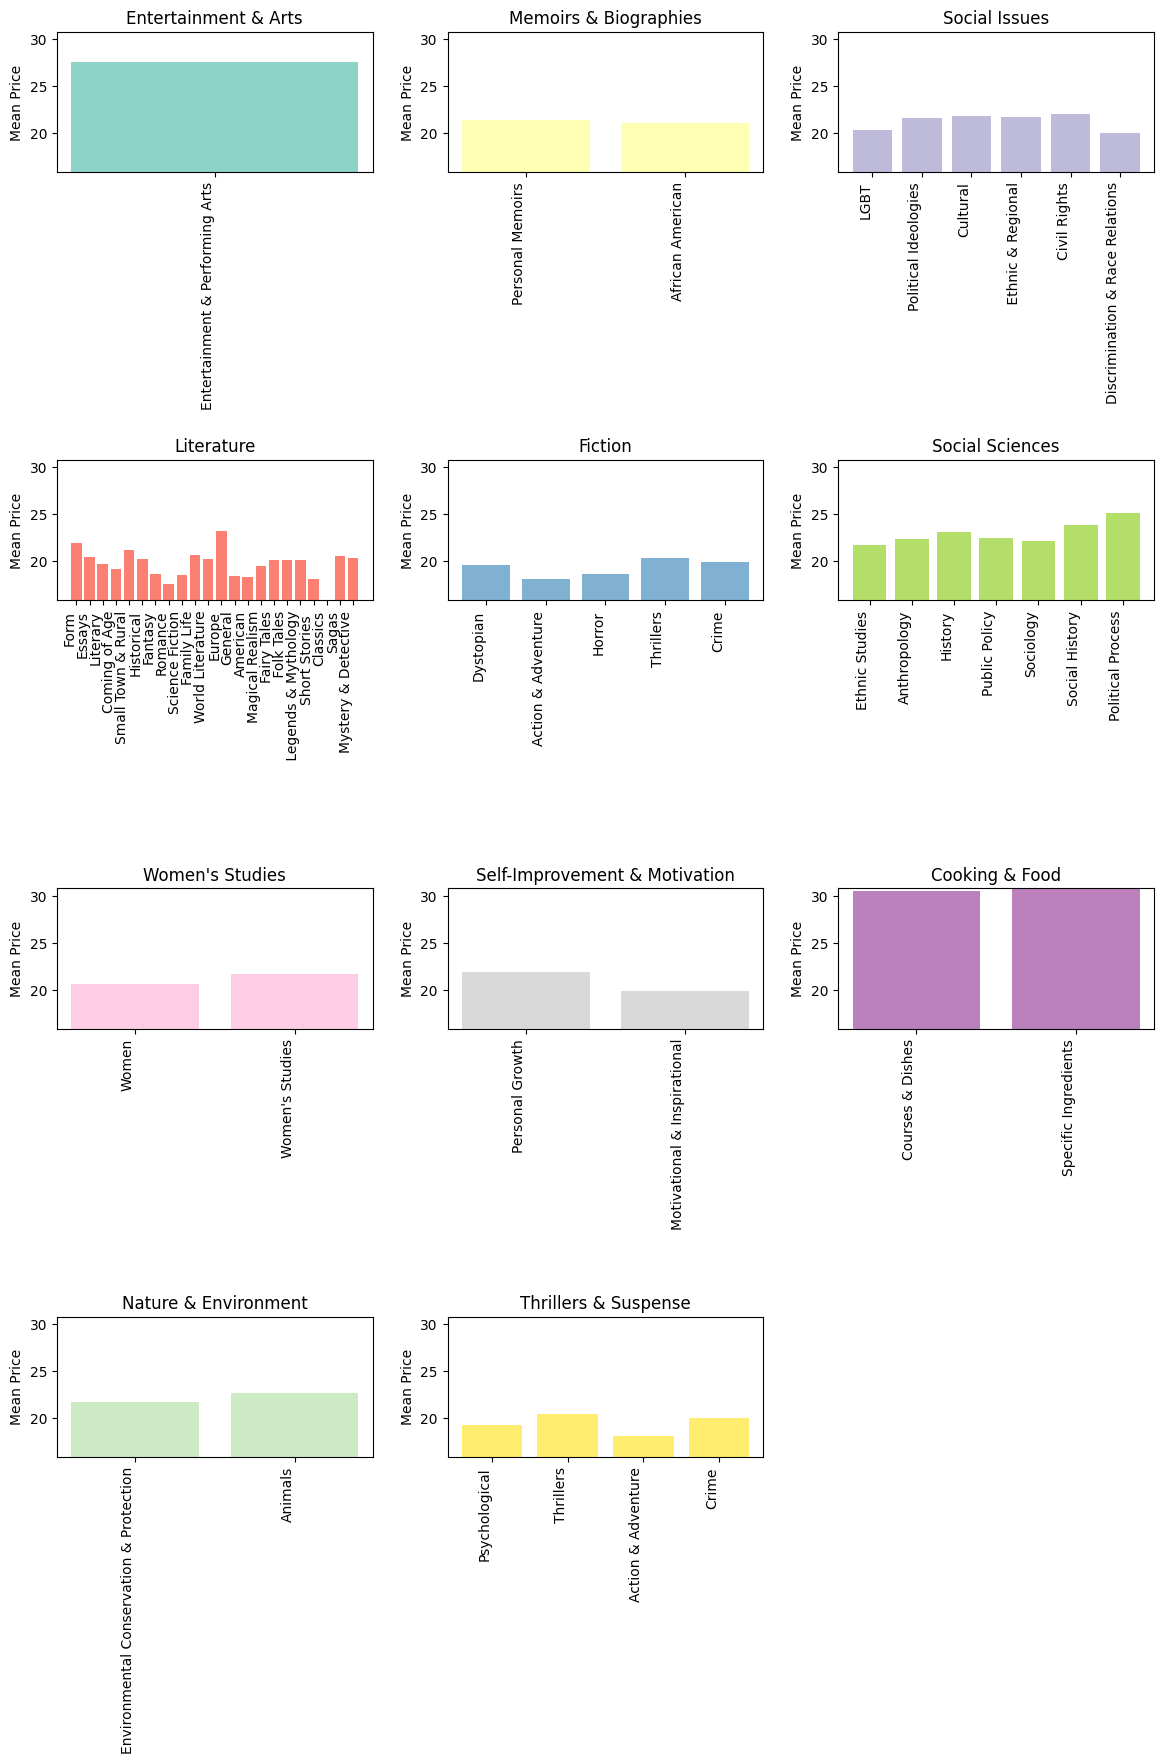

In [76]:
# Group the categories into eleven broader groups
grouped_categories = {
    'Entertainment & Arts': [
        'Entertainment & Performing Arts'
    ],
    'Memoirs & Biographies': [
        'Personal Memoirs',
        'African American'
    ],
    'Social Issues': [
        'LGBT',
        'Political Ideologies',
        'Cultural',
        ' Ethnic & Regional',
        'Civil Rights',
        'Discrimination & Race Relations'
    ],
    'Literature': [
        'Form',
        'Essays',
        'Literary',
        'Coming of Age',
        'Small Town & Rural',
        'Historical',
        'Fantasy',
        'Romance',
        'Science Fiction',
        'Family Life',
        'World Literature',
        'Europe',
        'General',
        'American',
        'Magical Realism',
        'Fairy Tales',
        ' Folk Tales',
        ' Legends & Mythology',
        'Short Stories ',
        'Classics',
        'Sagas',
        'Mystery & Detective'
    ],
    'Fiction': [
        'Dystopian',
        'Action & Adventure',
        'Horror',
        'Thrillers',
        'Crime'
    ],
    'Social Sciences': [
        'Ethnic Studies',
        'Anthropology',
        'History',
        'Public Policy',
        'Sociology',
        'Social History',
        'Political Process'
    ],
    'Women\'s Studies': [
        'Women',
        'Women\'s Studies'
    ],
    'Self-Improvement & Motivation': [
        'Personal Growth',
        'Motivational & Inspirational'
    ],
    'Cooking & Food': [
        'Courses & Dishes',
        'Specific Ingredients'
    ],
    'Nature & Environment': [
        'Environmental Conservation & Protection',
        'Animals'
    ],
    'Thrillers & Suspense': [
        'Psychological',
        'Thrillers',
        'Action & Adventure',
        'Crime'
    ]
}


# Set up the subplots
fig, axs = plt.subplots(4, 3, figsize=(12,18))

# Flatten the axes array for easier indexing
axs = axs.flatten()

color_palette = plt.cm.Set3(np.linspace(0, 1, len(grouped_categories)))

# Set initial min and max values for y-axis range
y_min = float('inf')
y_max = float('-inf')

# Iterate over the grouped categories and plot the mean prices with custom colors
for i, (group, categories) in enumerate(grouped_categories.items()):
    ax = axs[i]  # Select the current subplot

    # Filter the mean prices for the current group of categories
    mean_prices = category_mean_price.loc[categories]

    # Plot the mean prices as a bar graph with custom color
    ax.bar(mean_prices.index, mean_prices.values, color=color_palette[i])
    ax.set_title(group)
    ax.set_ylabel('Mean Price')

    # Update min and max values for y-axis range
    y_min = min(y_min, mean_prices.min())
    y_max = max(y_max, mean_prices.max())

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(mean_prices.index, rotation=90, ha='right')

# Set the same y-axis range across all subplots
for ax in axs:
    ax.set_ylim([y_min, y_max])

# Remove the last subplot
fig.delaxes(axs[-1])

# Adjust the layout and spacing of the subplots
plt.tight_layout(pad=2.0, h_pad=2.0)

# Display the plot
plt.show()

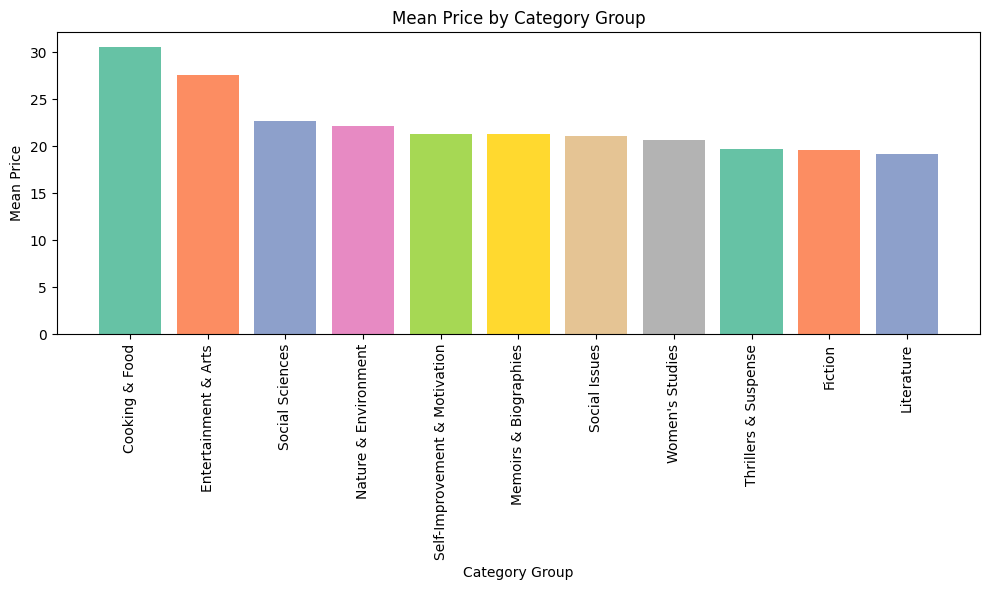

In [77]:
# Calculate the mean prices for each category group
mean_prices = {}

for group, categories in grouped_categories.items():
    mean_prices[group] = df_category.loc[df_category['Categories'].isin(categories), 'Prices'].mean()

# Sort the mean prices in descending order
mean_prices_sorted = dict(sorted(mean_prices.items(), key=lambda x: x[1], reverse=True))

# Create a bar plot for the mean prices
plt.figure(figsize=(10, 6))
plt.bar(mean_prices_sorted.keys(), mean_prices_sorted.values(), color=colors)
plt.xticks(rotation=90)
plt.xlabel('Category Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by Category Group')
plt.tight_layout()
plt.show()


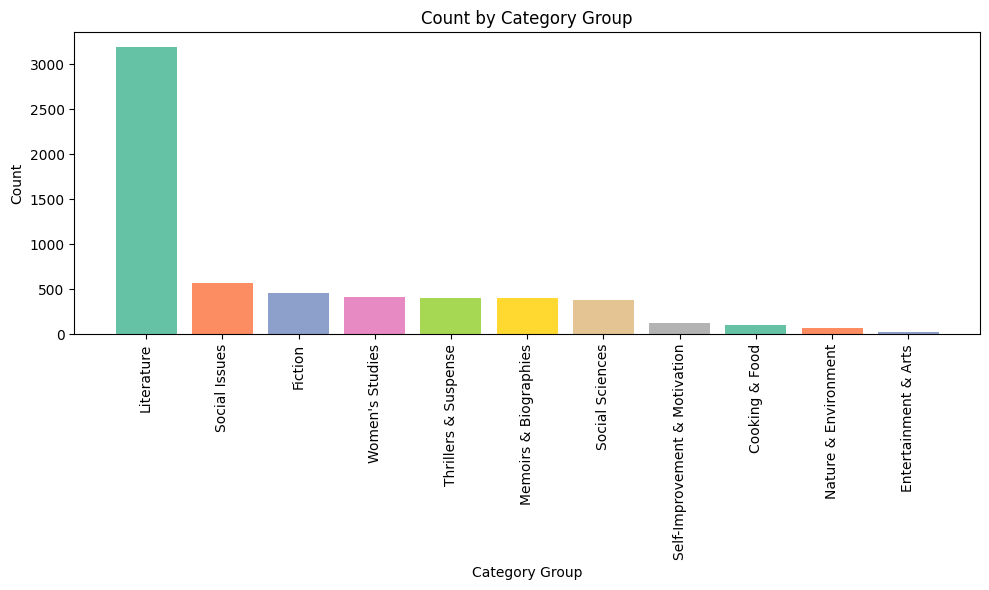

In [78]:
df_count = df_category.value_counts('Categories').reset_index(name='count')

count = {}
for group, categories in grouped_categories.items():
    count[group] = df_count.loc[df_count['Categories'].isin(categories), 'count'].sum()

count_sorted = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))

# Create a bar plot for the count
plt.figure(figsize=(10, 6))
plt.bar(count_sorted.keys(), count_sorted.values(), color=colors)
plt.xticks(rotation=90)
plt.xlabel('Category Group')
plt.ylabel('Count')
plt.title('Count by Category Group')
plt.tight_layout()
plt.show()


### Feature Importance

In [79]:
# seperate dependant and independant variables
X = df_label
y = X.pop("Prices")
X = X.select_dtypes('number')

In [80]:
import statsmodels.api as sm
# Add a constant column to X for intercept term
X_ = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Predictor'] = X_.columns
vif['VIF'] = [sm.OLS(X_[col], X_.drop(col, axis=1)).fit().rsquared for col in X_.columns]

# Display the VIF values
print(vif)

    Predictor       VIF
0       const  0.999143
1        Page  0.599254
2      Format  0.648568
3    Pub Date  0.179488
4   Publisher  0.355421
5      Author  0.647548
6  Cover Size  0.457391
7   Thickness  0.559123
8  Weight(lb)  0.724779
9  Categories  0.400395


In [81]:
from sklearn.ensemble import RandomForestRegressor

fi_model = RandomForestRegressor()
fi_model.fit(X,y)

RandomForestRegressor()

Feature Importance

In [ ]:
import shap

explainer = shap.Explainer(fi_model)
shap_values = explainer(X)

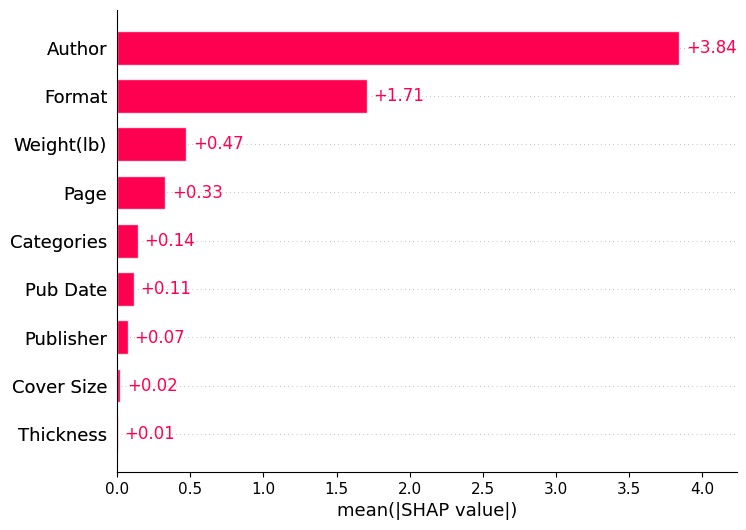

In [ ]:
shap.plots.bar(shap_values)

In [93]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [94]:
    import eli5
    from eli5.sklearn import PermutationImportance

    # Fit the permutation importance object to the model and data
    perm = PermutationImportance(fi_model, random_state=42).fit(X, y)

    # Display the feature importance using eli5
    eli5.show_weights(perm, feature_names=list(X.columns))

Weight,Feature
0.9192 ± 0.0528,Author
0.2768 ± 0.0230,Format
0.0698 ± 0.0099,Weight(lb)
0.0334 ± 0.0061,Page
0.0238 ± 0.0018,Categories
0.0119 ± 0.0014,Pub Date
0.0082 ± 0.0018,Publisher
0.0014 ± 0.0002,Cover Size
0.0011 ± 0.0004,Thickness


# Test Model

## Functions

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split(X, y, col, scale):
    if scale:
        scaler = StandardScaler()
        X_train, X_test, y_train, y_test = train_test_split(X[col], y, test_size=0.2, random_state=42)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        return X_train, X_test, y_train, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(X[col], y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

def fit_model(X_train, X_test, y_train, y_test, model_type, result, train_result):
    global y_pred
    model = model_type
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    if result:
        # MSE
        mse = mean_squared_error(y_test, y_pred)
        print("Predict MSE: ", mse)
        # RMSE
        rmse = np.sqrt(mse)
        print("Predict RMSE: ", rmse)
        # MAE
        mae = mean_absolute_error(y_test, y_pred)
        print("Predict MAE: ", mae)
        # R2 score
        r2 = r2_score(y_test, y_pred)
        print("Predict R2 score: ", r2)
        # Adjusted R2 score
        n = len(X_test)
        p = X_test.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
        print("Predict Adjusted R2 score: ", adj_r2)
        print("\n")
    if train_result:
        # MSE
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        print("Train MSE: ", train_mse)
        # RMSE
        train_rmse = np.sqrt(train_mse)
        print("Train RMSE: ", train_rmse)
        # MAE
        train_mae = mean_absolute_error(y_train, model.predict(X_train))
        print("Train MAE: ", train_mae)
        # R2 score
        train_r2 = r2_score(y_train, model.predict(X_train))
        print("Train R2 score: ", train_r2)
        # Adjusted R2 score
        n_train = len(X_train)
        adj_train_r2 = 1 - ((1 - train_r2) * (n_train - 1)) / (n_train - p - 1)
        print("Train Adjusted R2 score: ", adj_train_r2)

    return model, y_pred

In [97]:
# Create a scatter plot
def predict_scatter(model, y_pred, y_test):
    plt.scatter(y_test, y_pred)
    diagonal_line = np.linspace(min(y_test), max(y_test), 100)
    plt.plot(diagonal_line, diagonal_line, color='r', linestyle='--', label='Diagonal Line')
    # Add labels and title to the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual vs Predicted Values')
    # Show the plot
    plt.show()

In [98]:
def assumption_plot(model, title, y_pred, y_test):
  fig, axes = plt.subplots(2, 2, figsize = (13, 6))
  axes[0, 0].scatter(y_test, y_pred)
  diagonal_line = np.linspace(min(y_test), max(y_test), 100)
  axes[0, 0].plot(diagonal_line, diagonal_line, color='r', linestyle='--', label='Diagonal Line')
  # Add labels and title to the plot
  axes[0, 0].set_xlabel('Actual Values')
  axes[0, 0].set_ylabel('Predicted Values')
  axes[0, 0].set_title('Actual vs Predicted Values')

  residuals = y_test - y_pred
  stats.probplot(residuals, plot=axes[1, 0])
  axes[1, 0].set_title('Normality of Errors')
  axes[1, 0].set_ylabel('Residuals')

  axes[0, 1].scatter(y_pred, residuals)
  axes[0, 1].axhline(y=0, color='red', linestyle='--')
  axes[0, 1].set_xlabel('Predicted Values')
  axes[0, 1].set_ylabel('Residuals')
  axes[0, 1].set_title('Homoscedasticity')

  # Remove axes[1, 1]
  fig.delaxes(axes[1, 1])

  fig.suptitle(f'Assumption of {title}')
  plt.tight_layout()
  plt.show()

In [99]:
def plot_learning_curves(estimator,
                         X=X,
                         y=y,
                         train_sizes = [1, 100, 500, 1000, 1500, 1994],
                         cv = 5,
                         title = ''):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X=X, y=y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calculate mean and standard deviation for train and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

    # Add labels and title
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title(f'Learning Curves {title}')
    plt.legend(loc='best')

    # Set plot limits
    plt.ylim([0.0, max(train_mean.max(), val_mean.max()) + 0.1])

    # Display the plot
    plt.show()

In [100]:
def construct_model(model_type, X=X, y=y, scale=False, col=X.columns, result=True, train_result=True, title=None):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = split(X, y, col=col, scale=scale)
    model, y_pred = fit_model(X_train, X_test, y_train, y_test, model_type=model_type, result=result, train_result=train_result)
    if result:
        assumption_plot(model=model, title=title, y_pred=y_pred, y_test=y_test)
    return  X_train, X_test, y_train, y_test

In [101]:
# Function for formating Cross Validation score
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('          R_Squared       MSE     Explained_Variance')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'],
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' %
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))
    print('Std        %4.3f        %4.3f      %4.3f' %
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))


## Multiple Linear Regression

In [102]:
import scipy.stats as stats

Predict MSE:  6.6201466670551445
Predict RMSE:  2.5729645677807427
Predict MAE:  1.522772420427646
Predict R2 score:  0.8542249946942808
Predict Adjusted R2 score:  0.8515420191365068


Train MSE:  5.040727167945347
Train RMSE:  2.245156379396622
Train MAE:  1.4067107833284316
Train R2 score:  0.8834016737456709
Train Adjusted R2 score:  0.8828727498866543


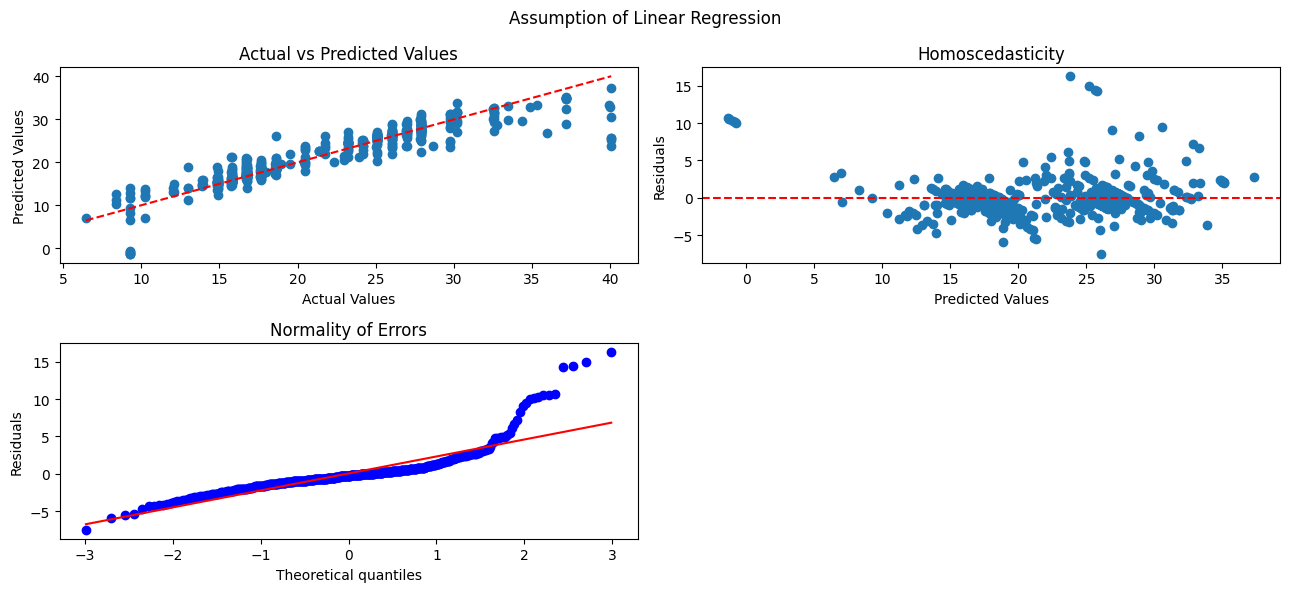

In [103]:
from sklearn.linear_model import LinearRegression
seed(42)
X_train1, X_test1, y_train1, y_test1 = construct_model(model_type=LinearRegression(), scale=True, result=True, title='Linear Regression') # scaling give same result

### K-fold Cross Validation

In [104]:
import sklearn.model_selection as ms

In [105]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
seed(42)
lreg = LinearRegression()
lregscores = ms.cross_validate(lreg, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
lregscores

{'fit_time': array([0.00211263, 0.00200343, 0.00099802, 0.00196362, 0.00196171]),
 'score_time': array([0.00151801, 0.        , 0.00094628, 0.00109172, 0.00105023]),
 'test_r2': array([0.87327202, 0.84218593, 0.87709058, 0.90165081, 0.89781577]),
 'test_neg_mean_squared_error': array([-5.25247714, -6.80326377, -4.82906295, -4.29097167, -4.94517083]),
 'test_explained_variance': array([0.87359469, 0.84218784, 0.87720409, 0.90167346, 0.89805504])}

In [106]:
print_cv(lregscores)

          R_Squared       MSE     Explained_Variance
Fold  1    0.873        -5.252      0.874
Fold  2    0.842        -6.803      0.842
Fold  3    0.877        -4.829      0.877
Fold  4    0.902        -4.291      0.902
Fold  5    0.898        -4.945      0.898
----------------------------------------
Mean       0.878        -5.224      0.879
Std        0.021        0.848      0.021


## Ridge and Lasso Regression


Predict MSE:  6.620052539726963
Predict RMSE:  2.5729462761058506
Predict MAE:  1.5227843546594348
Predict R2 score:  0.8542270673691708
Predict Adjusted R2 score:  0.8515441299587874


Train MSE:  5.040727234906958
Train RMSE:  2.245156394309082
Train MAE:  1.406724485072957
Train R2 score:  0.883401672196765
Train Adjusted R2 score:  0.8828727483307222


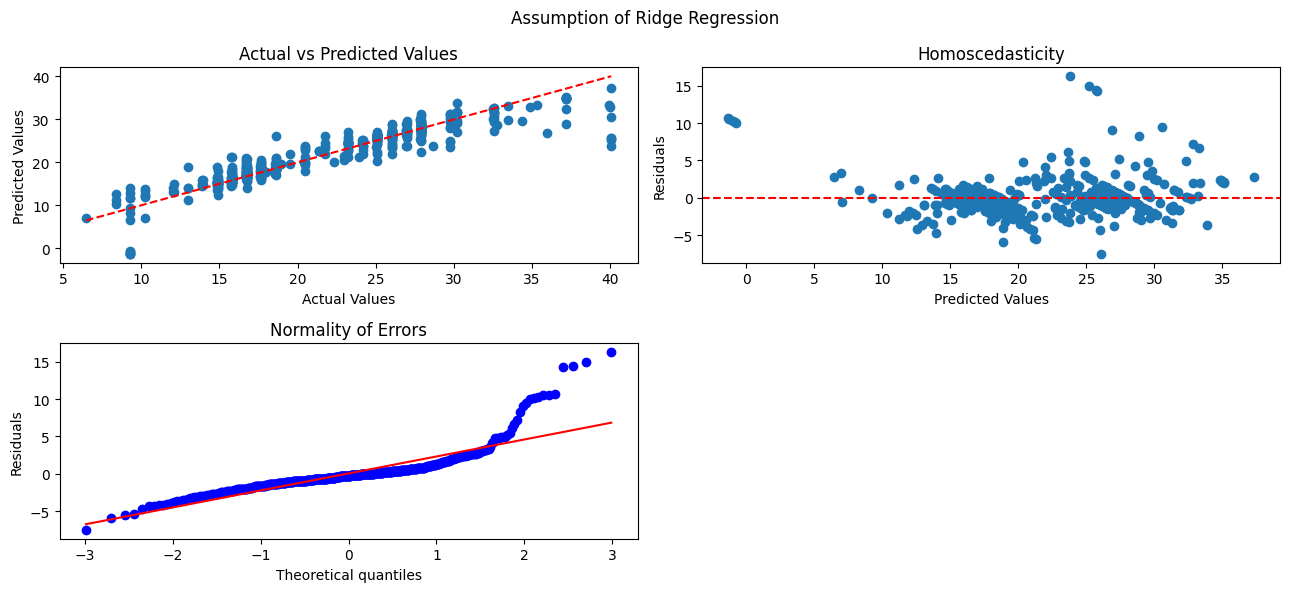

Predict MSE:  6.637037826842248
Predict RMSE:  2.5762449081642544
Predict MAE:  1.5065291294913987
Predict R2 score:  0.8538530529486639
Predict Adjusted R2 score:  0.8511632318372896


Train MSE:  5.09659245186691
Train RMSE:  2.2575633882278723
Train MAE:  1.39893497412534
Train R2 score:  0.8821094398310089
Train Adjusted R2 score:  0.8815746540237906


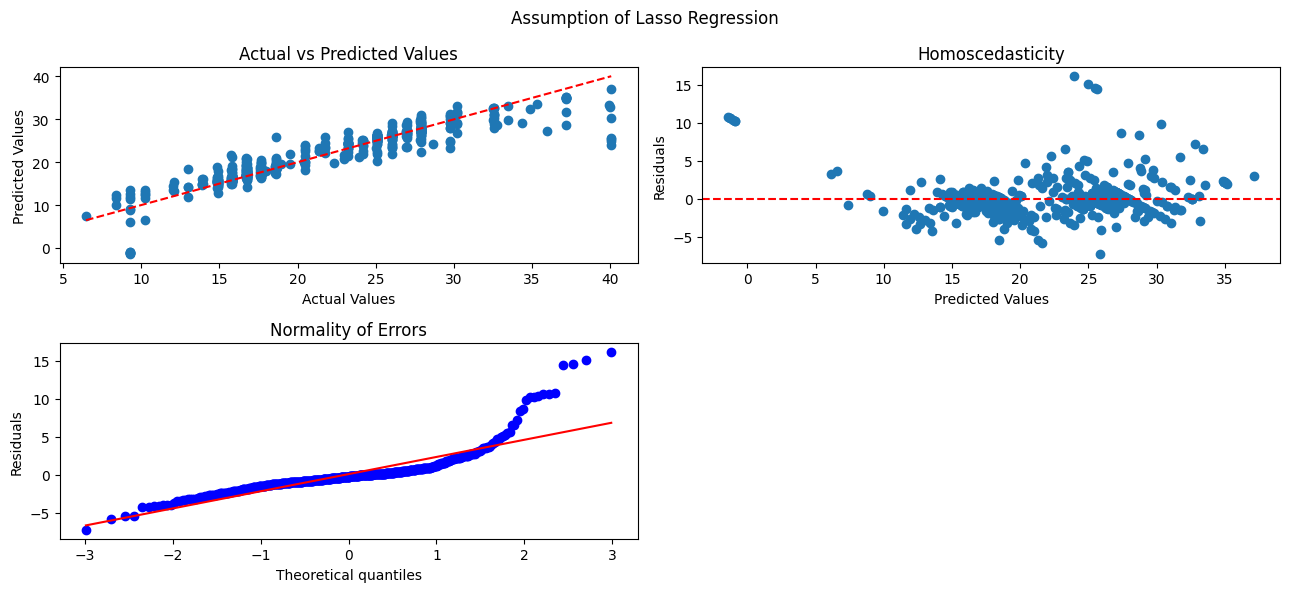

In [107]:
from sklearn.linear_model import Ridge, Lasso

alpha = 0.1 # tried a couples of alpha, didnt improve anything some got worse (maybe because model is not overfitting)
            # but aplha = 0.1 improve for lasso a bit
ridge = Ridge(alpha=alpha)
lasso = Lasso(alpha=alpha)

seed(42)
X_train2, X_test2, y_train2, y_test2 = construct_model(model_type=ridge, scale=True,  title='Ridge Regression') # scaling give same result
X_train3, X_test3, y_train3, y_test3 = construct_model(model_type=lasso, scale=True,  title='Lasso Regression') # scale = True give a neglichably better result

## Random Forest

Predict MSE:  3.0286573082708217
Predict RMSE:  1.740303797694765
Predict MAE:  0.6723913632428289
Predict R2 score:  0.933309251684785
Predict Adjusted R2 score:  0.9320818145992289


Train MSE:  0.4528590364534508
Train RMSE:  0.6729480191318278
Train MAE:  0.24494838767007515
Train R2 score:  0.9895248038784167
Train Adjusted R2 score:  0.9894772853476232


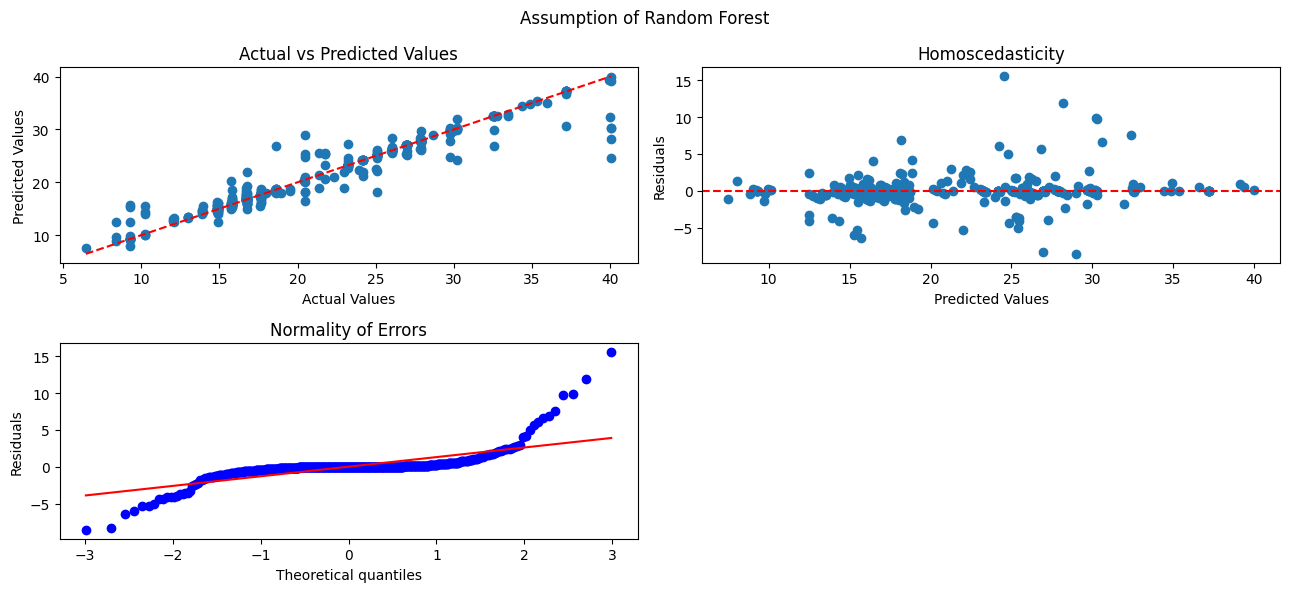

In [108]:
seed(42)
X_train4, X_test4, y_train4, y_test4 = construct_model(model_type=RandomForestRegressor(), scale=False, title='Random Forest') # scaling don't matter

### Grid search Cross Validation

```
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define the random forest regressor
rf = RandomForestRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Define the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Evaluate the model performance on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

-------------------------------------------------------------

Best Parameters:
bootstrap: True
max_depth: 10
max_features: auto
min_samples_leaf: 4
min_samples_split: 10
n_estimators: 100
Root Mean Squared Error: 1.8049546570109352 (train)
```

Predict MSE:  3.2973679764745993
Predict RMSE:  1.8158656273178915
Predict MAE:  0.7092734604089284
Predict R2 score:  0.9273922681112875
Predict Adjusted R2 score:  0.9260559294875689


Train MSE:  1.600738636918353
Train RMSE:  1.2652030022562992
Train MAE:  0.4932882909259096
Train R2 score:  0.9629729125150421
Train Adjusted R2 score:  0.9628049468964108


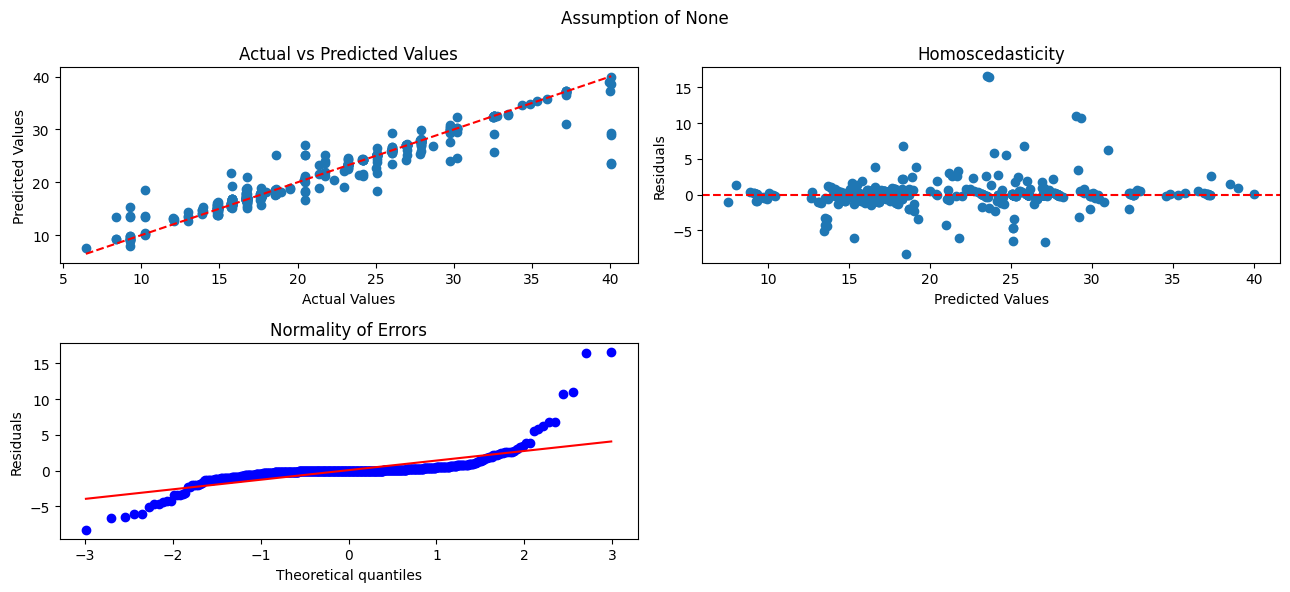

In [115]:
from sklearn.ensemble import RandomForestRegressor

Rdf = RandomForestRegressor(n_estimators = 100,
                            random_state = 42,
                            max_depth = 10,
                            min_samples_split = 10,
                            min_samples_leaf = 4,
                            max_features='auto',
                            bootstrap=True)
X_train4, X_test4, y_train4, y_test4 = construct_model(Rdf)

The learning curve shows no problem with overfitting or underfitting

### K-fold Cross Validation

In [116]:
Rdfscores = ms.cross_validate(Rdf, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
print_cv(Rdfscores)

          R_Squared       MSE     Explained_Variance
Fold  1    0.943        -2.380      0.943
Fold  2    0.902        -4.221      0.902
Fold  3    0.921        -3.089      0.922
Fold  4    0.966        -1.479      0.966
Fold  5    0.921        -3.816      0.921
----------------------------------------
Mean       0.931        -2.997      0.931
Std        0.022        0.986      0.022


## Support Vector Regression

Predict MSE:  6.290207506730798
Predict RMSE:  2.508028609631636
Predict MAE:  1.2433804791839853
Predict R2 score:  0.8614902238902136
Predict Adjusted R2 score:  0.8589409642072113


Train MSE:  3.628794561350764
Train RMSE:  1.9049395164547258
Train MAE:  1.0226451201491378
Train R2 score:  0.9160614415188084
Train Adjusted R2 score:  0.9156806718482788


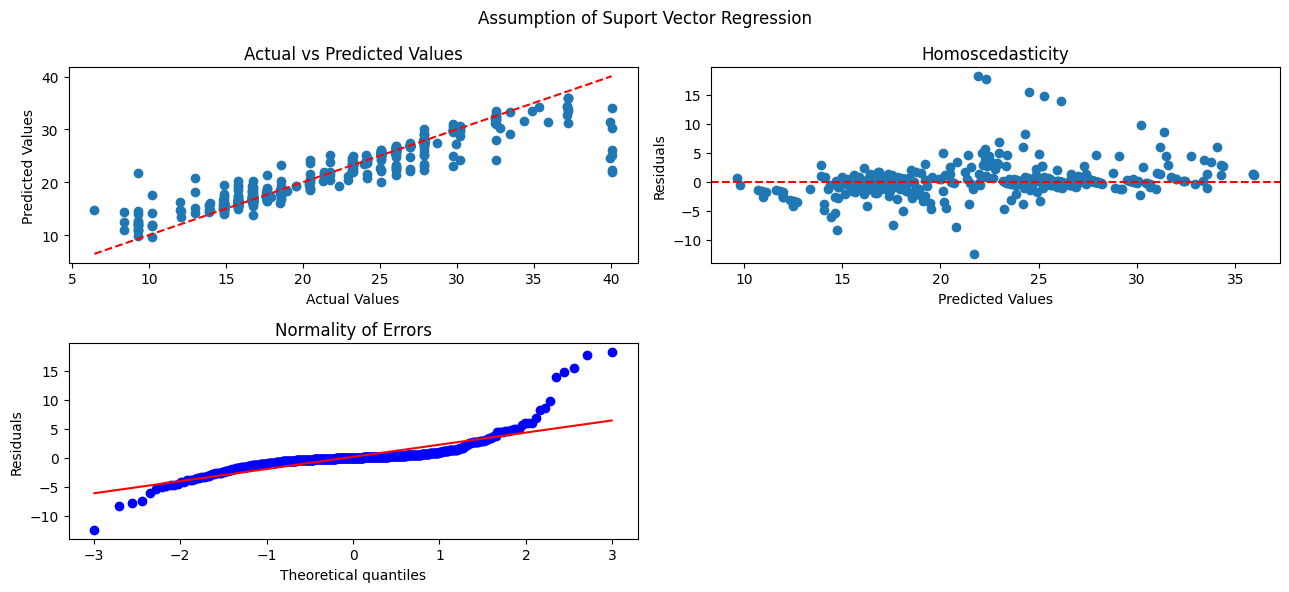

In [117]:
from sklearn.svm import SVR
seed(42)
X_train6, X_test6, y_train6, y_test6 = construct_model(model_type=SVR(), scale=True, title='Suport Vector Regression') # scale = True do better

### Grid search Cross Validation



```
from sklearn.model_selection import GridSearchCV

# Create an instance of SVR
svr = SVR(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for the grid search
param_grid = {
    'C': [0.1, 1, 10, 20, 25, 27, 30],  # Regularization parameter values to try
    'epsilon': [0.5, 1, 1.5, 2],  # Epsilon values to try
    'coef0': [0.01, 0.05, 0.1, 0, 1, 1.5],
    'gamma': [0.1, 0.01, 1, 'scale']
}

# Create an instance of GridSearchCV with SVR and the parameter grid
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the scaled data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Result:
C: 10
coef0: 0.01
epsilon: 0.5
gamma: 0.01
```

Predict MSE:  4.1914447019436425
Predict RMSE:  2.0473018101744653
Predict MAE:  0.9957239400173692
Predict R2 score:  0.9077047829310012
Predict Adjusted R2 score:  0.9060060979542712


Train MSE:  1.825639573248885
Train RMSE:  1.3511623045544474
Train MAE:  0.7281611540178786
Train R2 score:  0.9577706724660414
Train Adjusted R2 score:  0.95757910797622


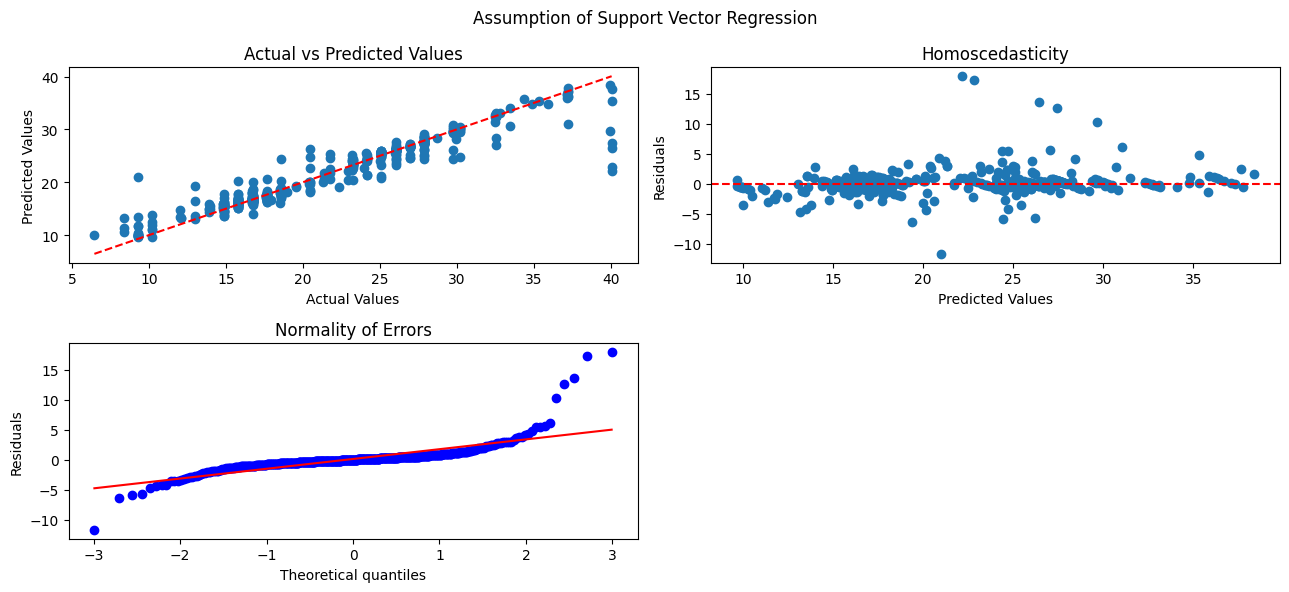

In [120]:
seed(42)
SVR = SVR(kernel='rbf',
    gamma=0.1,
    coef0=0.01,
    C=10,
    epsilon=0.5)
X_train7, X_test7, y_train7, y_test7 = construct_model(model_type=SVR, scale=True, title= 'Support Vector Regression')

### K-fold Cross Validation

In [121]:
seed(42)
SVRscores = ms.cross_validate(SVR, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
print_cv(SVRscores)

          R_Squared       MSE     Explained_Variance
Fold  1    0.938        -2.566      0.939
Fold  2    0.898        -4.399      0.898
Fold  3    0.939        -2.378      0.939
Fold  4    0.957        -1.880      0.957
Fold  5    0.915        -4.127      0.915
----------------------------------------
Mean       0.929        -3.070      0.930
Std        0.021        1.003      0.021


## Neural Network Regression

Predict MSE:  4.6822158666850315
Predict RMSE:  2.1638428470397364
Predict MAE:  1.2414986597566653
Predict R2 score:  0.8968980481648221
Predict Adjusted R2 score:  0.8950004662292054


Train MSE:  3.10079054596474
Train RMSE:  1.7609061718231156
Train MAE:  1.1202606185732233
Train R2 score:  0.9282748350230376
Train Adjusted R2 score:  0.9279494688512672


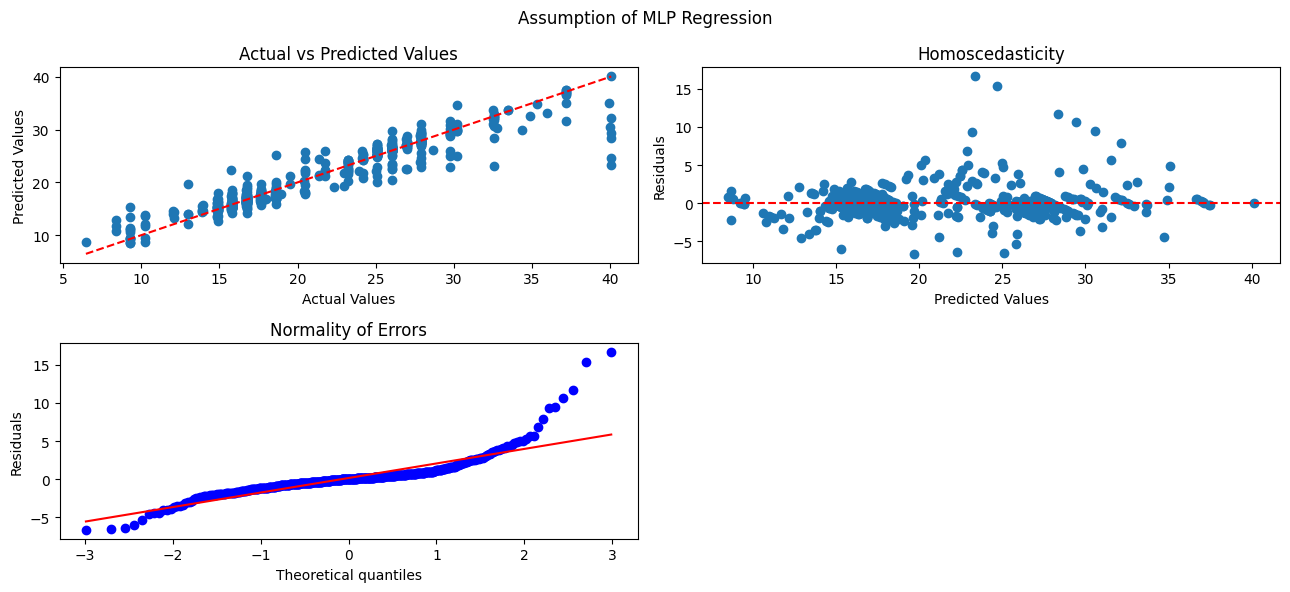

In [122]:
from sklearn.neural_network import MLPRegressor
seed(42)
X_train8, X_test8, y_train8, y_test8 = construct_model(model_type=MLPRegressor(), scale=True, title='MLP Regression') # scale = True do much better

### Grid search Cross Validation

````
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import warnings


# Create an instance of MLPRegressor
mlp = MLPRegressor(random_state=42)
X_train, X_test, y_train, y_test = split(X=X, y=y, col=X.columns, scale=True)

# Define the parameter grid for the grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200,350,500],
}

# Create an instance of GridSearchCV with MLPRegressor and the parameter grid
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled data
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Parameters:
activation: tanh
alpha: 0.0001
hidden_layer_sizes: (100, 50)
learning_rate: constant
max_iter: 500
solver: adam
````

Predict MSE:  3.784904196332591
Predict RMSE:  1.9454830239127225
Predict MAE:  1.0340222117808042
Predict R2 score:  0.9166567665263743
Predict Adjusted R2 score:  0.9151228419839149


Train MSE:  1.9862273954156406
Train RMSE:  1.4093357993805595
Train MAE:  0.8507627988981805
Train R2 score:  0.9540560752149658
Train Adjusted R2 score:  0.9538476602335821


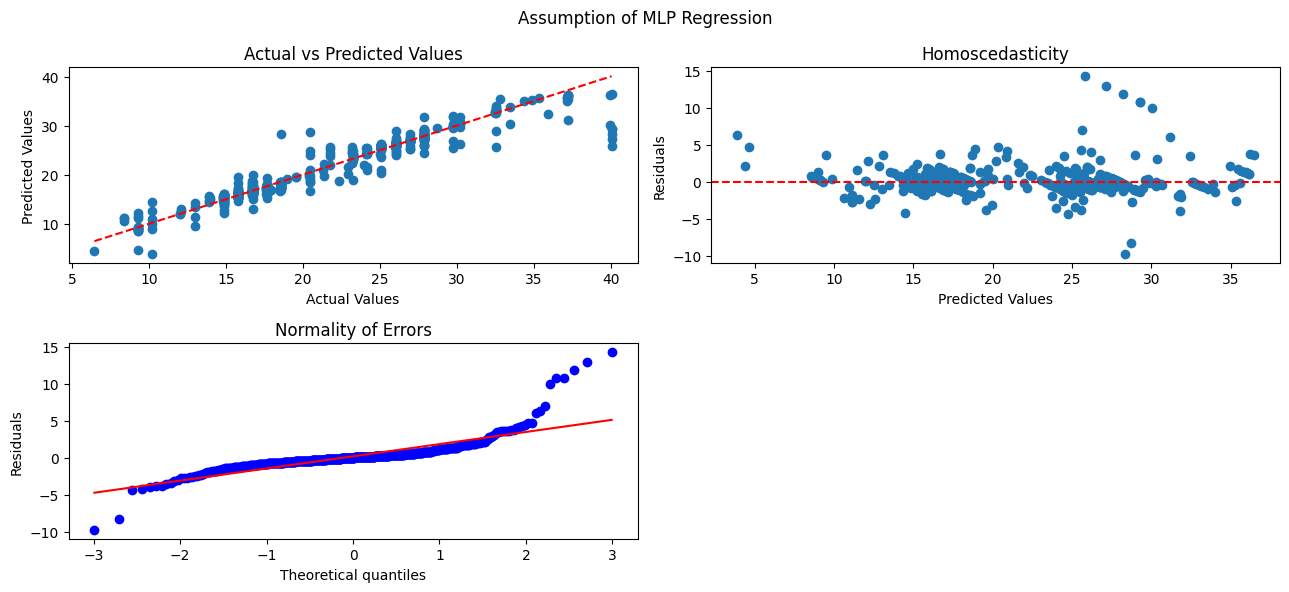

In [123]:
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),
                   activation='tanh',
                   solver='adam',
                   random_state=42,
                   max_iter=300,
                   learning_rate='constant',
                   alpha=0.0001)
X_train9, X_test9, y_train9, y_test9 = construct_model(model_type=mlp, scale=True, title='MLP Regression')

### K-fold Cross Validation

In [124]:
mlpscores = ms.cross_validate(mlp, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
print_cv(mlpscores)

          R_Squared       MSE     Explained_Variance
Fold  1    0.927        -3.017      0.927
Fold  2    0.879        -5.220      0.880
Fold  3    0.909        -3.585      0.909
Fold  4    0.941        -2.556      0.941
Fold  5    0.913        -4.191      0.916
----------------------------------------
Mean       0.914        -3.714      0.915
Std        0.021        0.932      0.020


## Gradient Boosting Regression

Predict MSE:  3.4642741524863463
Predict RMSE:  1.8612560684887898
Predict MAE:  0.9218831768046278
Predict R2 score:  0.9237170098553412
Predict Adjusted R2 score:  0.9223130284416359


Train MSE:  1.338825264507657
Train RMSE:  1.1570761705729045
Train MAE:  0.7132927888580435
Train R2 score:  0.9690312965198169
Train Adjusted R2 score:  0.9688908134899169


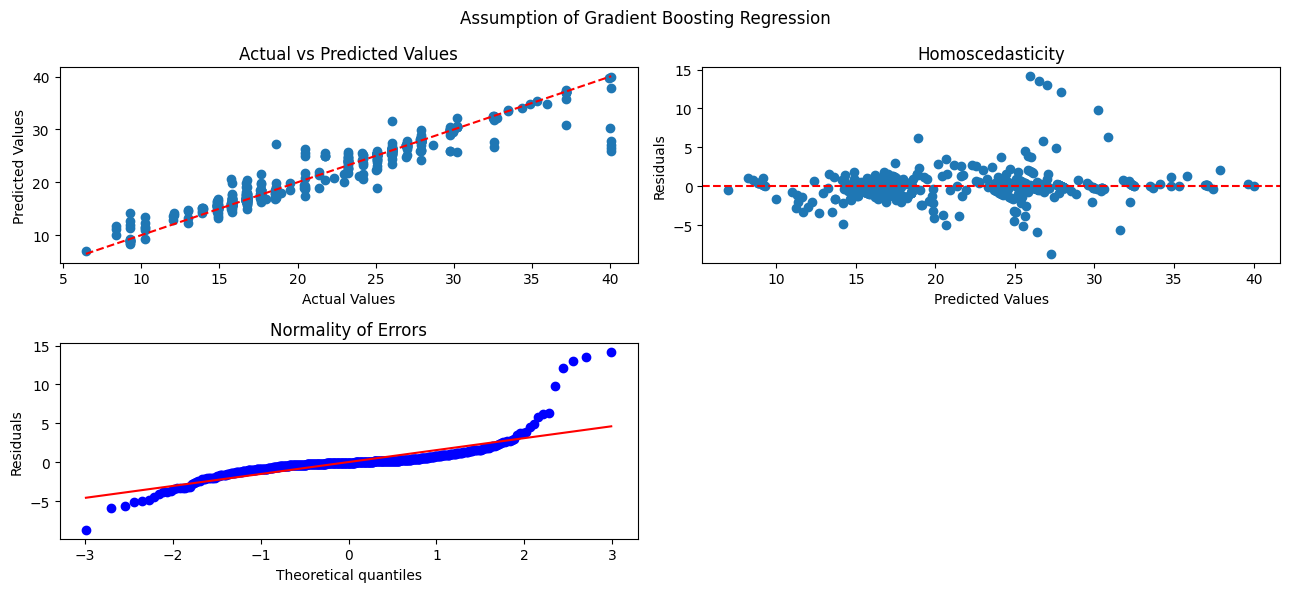

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
seed(42)
X_train10, X_test10, y_train10, y_test10 = construct_model(model_type=GradientBoostingRegressor(), scale=True, title='Gradient Boosting Regression') # scale didn't matter

### GridSearch Cross Validation

````
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [1, 0.1, 0.01],
    'n_estimators': [50, 100, 200, 300]
}

xgbr = GradientBoostingRegressor()
grid_search = GridSearchCV(xgbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_gbr.predict(X_test)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)
````

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 1.870940968176068

Predict MSE:  3.5062128954520753
Predict RMSE:  1.8724884233159027
Predict MAE:  0.883401301127116
Predict R2 score:  0.9227935226902051
Predict Adjusted R2 score:  0.9213725445802089


Train MSE:  0.6229555185063356
Train RMSE:  0.789275312236697
Train MAE:  0.5004231156160975
Train R2 score:  0.9855902594271247
Train Adjusted R2 score:  0.9855248926604131


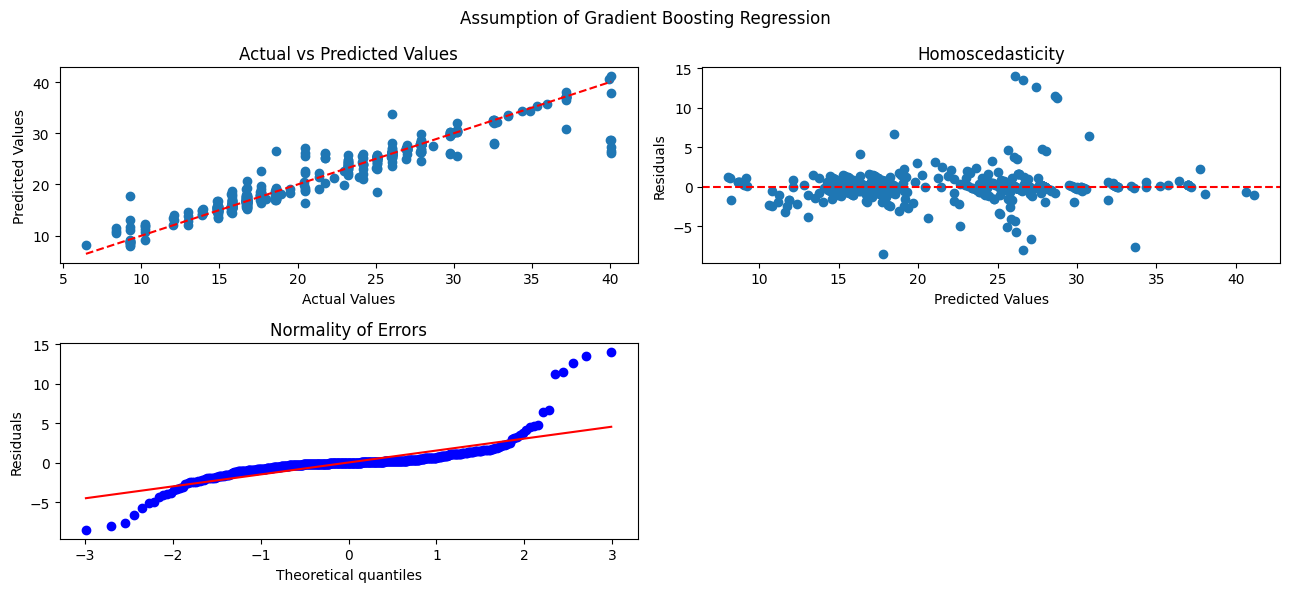

In [126]:
gbr = GradientBoostingRegressor(learning_rate=0.1,
                                  max_depth=3,
                                  n_estimators=300,
                                  alpha=0.1) # alpha didn't matter much here
X_train11, X_test11, y_train11, y_test11 = construct_model(model_type=gbr, scale=False, title='Gradient Boosting Regression')

### Extreme Gradient Boosting

````
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [1, 2, 3, 5, 7],
    'learning_rate': [1, 0.1, 0.01],
    'n_estimators': [25, 50, 100, 200, 300]
}

xgbr = xgb.XGBRegressor()
grid_search = GridSearchCV(xgbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
````

Predict MSE:  3.3872034419126793
Predict RMSE:  1.8404356663335666
Predict MAE:  0.9144744071106736
Predict R2 score:  0.9254140996341376
Predict Adjusted R2 score:  0.924041353001637


Train MSE:  1.4516568367712819
Train RMSE:  1.2048472254901375
Train MAE:  0.7182038112315391
Train R2 score:  0.9664213610806915
Train Adjusted R2 score:  0.9662690386259165


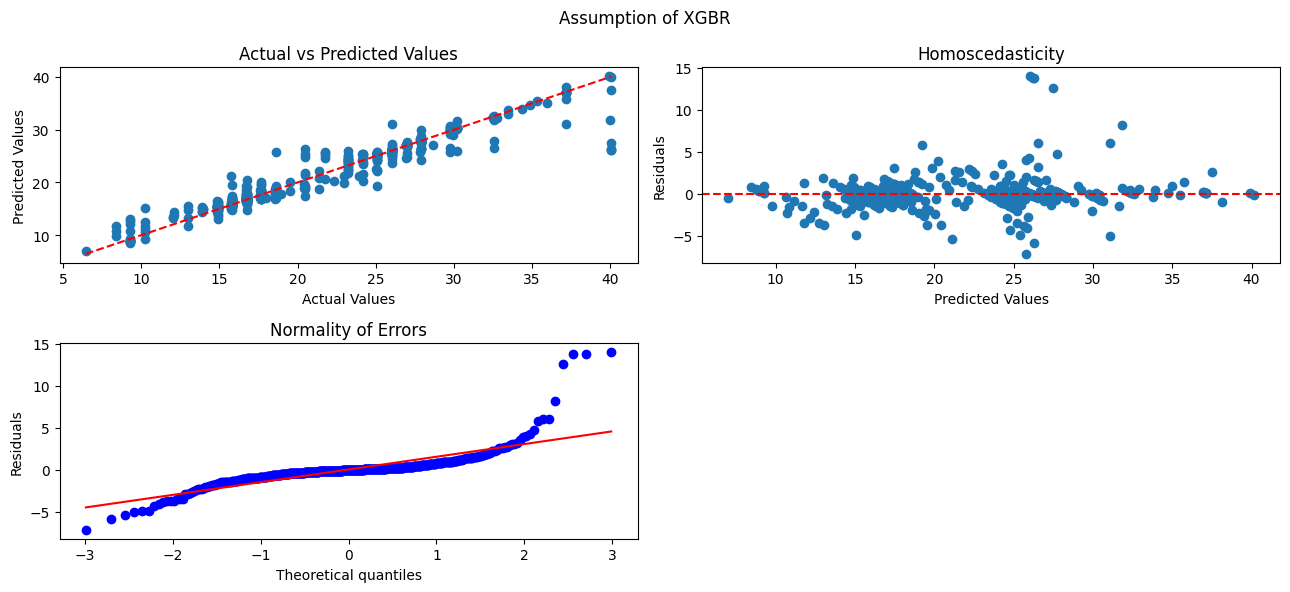

In [129]:
import xgboost as xgb
seed(42)
xgbr = xgb.XGBRegressor(learning_rate=0.1,
            max_depth=3,
            n_estimators=100,
            alpha=0.1) # alpha didn't matter much here
X_train12, X_test12, y_train12, y_test12 = construct_model(model_type=xgbr, scale=False, title='XGBR') # Scale dont matter

The learning curve shows no problem with overfitting or underfitting

### K-fold Cross Validation

In [130]:
seed(42)
model = ms.cross_validate(xgbr, X_train, y_train, scoring=scoring,
                        cv=5, return_train_score=False)
print_cv(mlpscores)

          R_Squared       MSE     Explained_Variance
Fold  1    0.927        -3.017      0.927
Fold  2    0.879        -5.220      0.880
Fold  3    0.909        -3.585      0.909
Fold  4    0.941        -2.556      0.941
Fold  5    0.913        -4.191      0.916
----------------------------------------
Mean       0.914        -3.714      0.915
Std        0.021        0.932      0.020


# Model Comparison

In [131]:
scaler_curve = StandardScaler()
X_scaled = scaler_curve.fit_transform(X)

In [132]:
def plot_learning_all_curves(estimator, ax, train_sizes = [1, 100, 500, 1000, 1500, 1994], cv=5, X=X, y=y, X_scaled=X_scaled, scale=False):
    if scale:
        train_sizes, train_scores, val_scores = learning_curve(estimator, X_scaled, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    else:
        train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    # Calculate mean and standard deviation for train and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curves
    # ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    # ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    # ax.plot(train_sizes, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Score')
    # ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

    ax.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, val_mean, 'o-', color='g', label='Validation score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='g')

    # Add labels and title
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('MSE')
    ax.legend(loc='best')

    # Set plot limits
    ax.set_ylim([0.0, max(train_mean.max(), val_mean.max()) + 0.1])

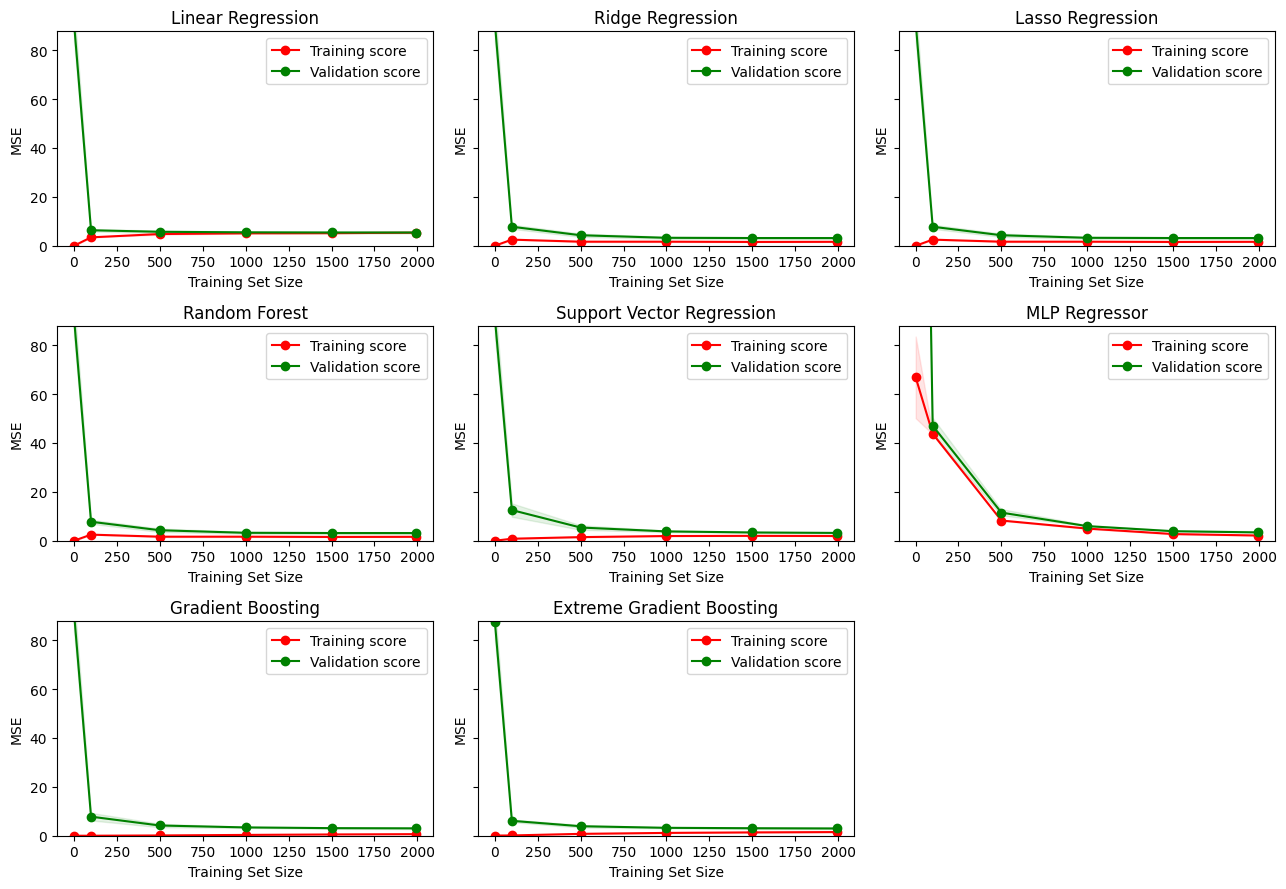

In [133]:
# # Learning curves of all Models:

fig, ax = plt.subplots(3, 3, figsize = (13, 9), sharey=True)
plot_learning_all_curves(estimator=LinearRegression(), ax=ax[0, 0], scale=True)
ax[0, 0].set_title('Linear Regression')
plot_learning_all_curves(estimator=Rdf, ax=ax[0, 1], scale=True)
ax[0, 1].set_title('Ridge Regression')
plot_learning_all_curves(estimator=Rdf, ax=ax[0, 2], scale=True)
ax[0, 2].set_title('Lasso Regression')
plot_learning_all_curves(estimator=Rdf, ax=ax[1, 0], scale=False)
ax[1, 0].set_title('Random Forest')
plot_learning_all_curves(estimator=SVR, ax=ax[1, 1], scale=True)
ax[1, 1].set_title('Support Vector Regression')
plot_learning_all_curves(estimator=mlp, ax=ax[1, 2], scale=True)
ax[1, 2].set_title('MLP Regressor')
plot_learning_all_curves(estimator=gbr, ax=ax[2, 0], scale=False)
ax[2, 0].set_title('Gradient Boosting')
plot_learning_all_curves(estimator=xgbr, ax=ax[2, 1], scale=False)
ax[2, 1].set_title('Extreme Gradient Boosting')
# delete ax[2, 2]
fig.delaxes(ax[2, 2])
plt.tight_layout()
plt.show()

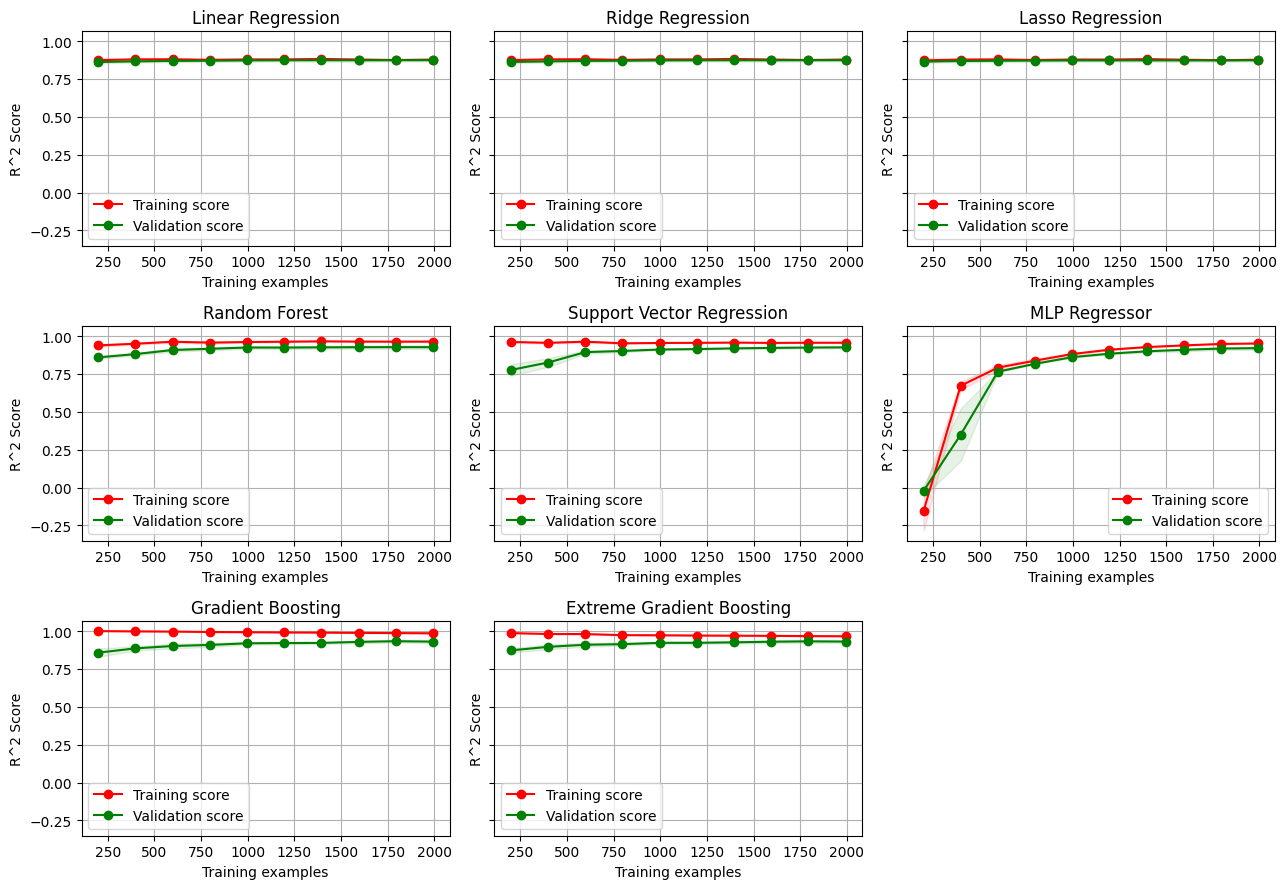

In [135]:
models = [LinearRegression(), ridge, lasso, Rdf, SVR, mlp, gbr, xgbr]
model_names = model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'Support Vector Regression', 'MLP Regressor', 'Gradient Boosting', 'Extreme Gradient Boosting']
scaling = [True, True, True, False, True, True, False, False]

# Create subplots for 3 rows and 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 9), sharey=True)

# Flatten the axes array
axes = axes.flatten()

# Loop through each model and plot learning curve
for idx, (model, ax, model_name, scale) in enumerate(zip(models, axes, model_names, scaling)):
    if scale:
        train_sizes, train_scores, valid_scores = learning_curve(model, X_scaled, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2', n_jobs=-1)
    else:
        train_sizes, train_scores, valid_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation score')
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
    # ax.set_ylim([min_value], )
    ax.set_title(model_name)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("R^2 Score")
    ax.grid(True)
    ax.legend(loc='best')

# Remove the last subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Model Construction (Test different feature combination)

In [ ]:
Rdf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='auto',
    bootstrap=True)

In [ ]:
X.columns

Index(['Page', 'Format', 'Pub Date', 'Publisher', 'Author', 'Cover Size',
       'Thickness', 'Weight(lb)', 'Categories'],
      dtype='object')

Predict MSE:  3.0563605332231556
Predict RMSE:  1.7482449866146208
Predict MAE:  0.6733569031568636
Predict R2 score:  0.932699229283845
Predict Adjusted R2 score:  0.9314605647921366


Train MSE:  0.4579437179761347
Train RMSE:  0.6767153891970646
Train MAE:  0.24621017010289178
Train R2 score:  0.9894071888329424
Train Adjusted R2 score:  0.9893591367661564


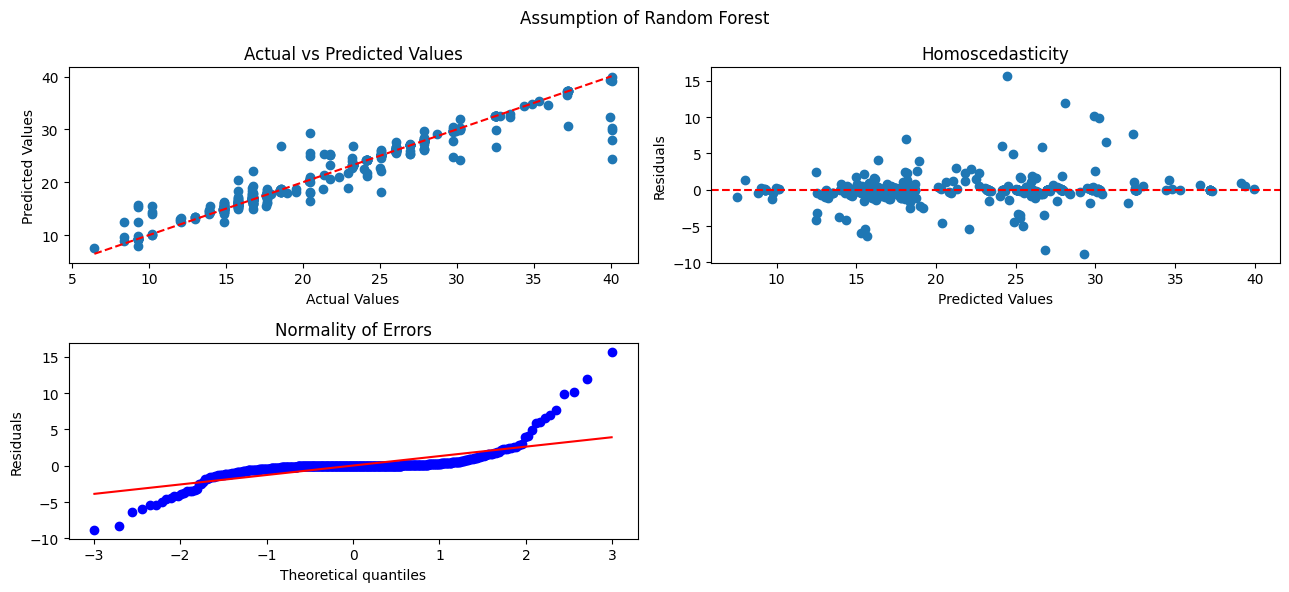

In [ ]:
X_train, X_test, y_train, y_test = construct_model(model_type=RandomForestRegressor(), scale=False, title='Random Forest')

In [ ]:
col = ['Page', 'Format', 'Pub Date', 'Author', 'Weight(lb)', 'Categories']

Predict MSE:  2.875714086274724
Predict RMSE:  1.695793055261969
Predict MAE:  0.6698036138836829
Predict R2 score:  0.9366770470100617
Predict Adjusted R2 score:  0.9359048158760381


Train MSE:  0.4312343464617038
Train RMSE:  0.6566843583196601
Train MAE:  0.2403751649968125
Train R2 score:  0.9900250100143172
Train Adjusted R2 score:  0.9899948892594536


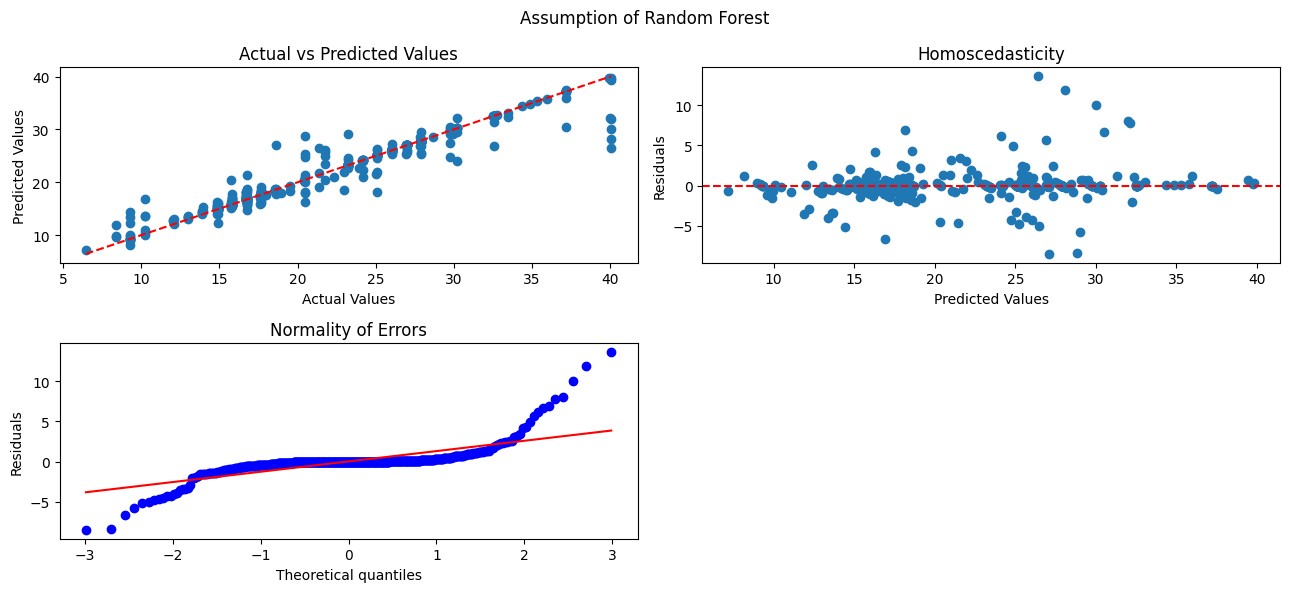

In [ ]:
X_train, X_test, y_train, y_test = construct_model(model_type=RandomForestRegressor(), scale=False, title='Random Forest', col=col)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def apply_PCA(X, scale=True, k=None, returns=False, importance=False):
    # scaling features
    scaler = StandardScaler()
    if scale:
        X_def = scaler.fit_transform(X)
    else:
        X_def = X
    # select k components
    pca = PCA(n_components=k)
    pca.fit(X_def)
    # plot cumulative sum of explained variance
    components = len(pca.explained_variance_ratio_) if k is None else k
    plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
    plt.xlabel('Number of components')
    plt.ylabel('Explained Variance (%)')
    # get X_pca
    X_pca = pca.transform(X_def)
    if returns:
        return X_pca
    if importance:
        # Get the explained variance ratios from PCA
        explained_variance_ratios = pca.explained_variance_ratio_
        # Calculate the feature importance based on contribution to explained variance
        feature_importance = np.abs(X_pca.T) * explained_variance_ratios[:, np.newaxis]

        # Compute the cumulative feature importance
        cumulative_importance = np.cumsum(feature_importance, axis=1)

        # Plot the feature importance
        n_features = len(explained_variance_ratios)
        feature_indices = np.arange(n_features)
        feature_names = X.columns  # Use your actual feature names

        plt.figure(figsize=(10, 6))
        for i in range(n_features):
            plt.plot(feature_indices, cumulative_importance[:, i], label=f'Component {i + 1}')

        plt.xlabel('Feature Index')
        plt.ylabel('Cumulative Importance')
        plt.title('Feature Importance based on Explained Variance')
        plt.xticks(feature_indices, feature_names, rotation='vertical')
        plt.legend()
        plt.tight_layout()
        plt.show()
        # absolute loadings
        importance = np.abs(pca.components_).sum(axis=0)
        plt.figure(figsize=(10, 6))
        plt.bar(range(n_features), importance)
        plt.xlabel('Feature Index')
        plt.ylabel('Importance')
        plt.title('Feature Importance based on Loadings')
        plt.xticks(range(n_features), feature_names, rotation='vertical')
        plt.tight_layout()
        plt.show()
